# Satellite data from August 2021

Analyzing the Drone Ocean Color Data in relation to MODIS Chla and SST 

In [3]:
import numpy as np
import xarray as xr
import os.path as op
from matplotlib import colors, ticker
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import datetime
%matplotlib inline

import cartopy.crs as crs
# import hvplot.xarray
import pandas as pd
import geopandas as gpd
# import hvplot.pandas

import netCDF4
from netCDF4 import Dataset

from datetime import datetime, timedelta
import geopandas as gpd
import pandas as pd

from utils import *
from georeg import *

### Load in flight data

In [4]:
# flight 0
gdf0 = gpd.read_file('data/oc_analysis_20210826_A1_gulf_stream_surveys.shp')
gdf0['sst_c'] = gdf0['sst']-273.15
gdf0['time'] = pd.to_datetime(gdf0['time_str'])
gdf0['flight'] = 3
df0 = gdf0.drop('geometry', axis=1)

# flight 1
gdf1 = gpd.read_file('data/oc_analysis_20210827_A1_gulf_stream_surveys.shp')
gdf1['sst_c'] = gdf1['sst']-273.15
gdf1['time'] = pd.to_datetime(gdf1['time_str'])
gdf1['flight'] = 1
# for some reason I can't have the geometry column due to a bug in holoviz
df1 = gdf1.drop('geometry', axis=1)

# flight 2
gdf2 = gpd.read_file('data/oc_analysis_20210827_A2_gulf_stream_surveys.shp')
gdf2['time'] = pd.to_datetime(gdf2['time_str'])
gdf2['sst_c'] = gdf2['sst']-273.15
gdf2['flight'] = 2
df2 = gdf2.drop('geometry', axis=1)

# # flight 3
# gdf3 = gpd.read_file('data/oc_analysis_20210828_A1_gulf_stream_surveys.shp')
# gdf3['sst_c'] = gdf3['sst']-273.15
# gdf3['time'] = pd.to_datetime(gdf3['time_str'])
# gdf3['flight'] = 3
# df3 = gdf3.drop('geometry', axis=1)


# flight 3
gdf3 = gpd.read_file('data/oc_analysis_20210828_A2_gulf_stream_surveys.shp')
gdf3['sst_c'] = gdf3['sst']-273.15
gdf3['time'] = pd.to_datetime(gdf3['time_str'])
gdf3['flight'] = 3
df3 = gdf3.drop('geometry', axis=1)

uncert_gdf = gpd.read_file('data/oc_analysis_20210826_A1_trios_comparison_gulf_stream_surveys.shp')
uncert_gdf['sst_c'] = uncert_gdf['sst']-273.15
uncert_gdf['time'] = pd.to_datetime(gdf3['time_str'])
uncert_gdf['flight'] = 3
uncert_df = uncert_gdf.drop('geometry', axis=1)

# # flight 3
# gdf4 = gpd.read_file('chla_sst_flight4.shp')
# gdf4['sst_c'] = gdf4['sst']-273.15
# gdf4['time'] = pd.to_datetime(gdf4['time_str'])
# gdf4['flight'] = 4
# df4 = gdf4.drop('geometry', axis=1)

In [ ]:
1922 - 1806

In [4]:
gdf2 = gpd.read_file('data/oc_analysis_20210827_A2_gulf_stream_surveys.shp')
gdf2['time'] = pd.to_datetime(gdf2['time_str'])
gdf2['sst_c'] = gdf2['sst']-273.15
gdf2['flight'] = 2
df2 = gdf2.drop('geometry', axis=1)
gdf2

chla   Latitude  Longitude    sst  \
0    0.261675  35.833953 -74.650561  28.31   
1    0.261908  35.834083 -74.650636  28.30   
2    0.263454  35.834228 -74.650719  28.30   
3    0.264084  35.834364 -74.650789  28.18   
4    0.265750  35.834511 -74.650853  28.09   
..        ...        ...        ...    ...   
308  0.264309  35.840167 -74.641694  26.71   
309  0.264085  35.840303 -74.641800  26.72   
310  0.264419  35.840444 -74.641919  26.73   
311  0.264354  35.840606 -74.642056  26.70   
312  0.264029  35.840747 -74.642167  26.72   

                                            lw_spectra             time_str  \
0    [0.00494708 0.00146186 0.00015672 0.00010715 0...  2021-08-27 19:12:11   
1    [4.91810449e-03 1.45053031e-03 1.53388742e-04 ...  2021-08-27 19:12:13   
2    [4.90943962e-03 1.48769193e-03 1.44455277e-04 ...  2021-08-27 19:12:15   
3    [4.89712876e-03 1.51272347e-03 1.57072839e-04 ...  2021-08-27 19:12:17   
4    [0.004857   0.00155053 0.00015901 0.00010618 0...  2021-08-27 19:12:19   
..                                                 ...                  ...   
308  [4.67908023e-03 1.35071239e-03 9.61368235e-05 ...  2021-08-27 19:22:42   
309  [4.68053349e-03 1.34495580e-03 9.59777046e-05 ...  2021-08-27 19:22:44   
310  [4.66235579e-03 1.33742866e-03 8.27377274e-05 ...  2021-08-27 19:22:46   
311  [4.65089626e-03 1.32920202e-03 8.11337002e-05 ...  2021-08-27 19:22:48   
312  [4.65595452e-03 1.32409735e-03 8.32716261e-05 ...  2021-08-27 19:22:50   

                       geometry                time   sst_c  flight  
0    POINT (-74.65056 35.83395) 2021-08-27 19:12:11 -244.84       2  
1    POINT (-74.65064 35.83408) 2021-08-27 19:12:13 -244.85       2  
2    POINT (-74.65072 35.83423) 2021-08-27 19:12:15 -244.85       2  
3    POINT (-74.65079 35.83436) 2021-08-27 19:12:17 -244.97       2  
4    POINT (-74.65085 35.83451) 2021-08-27 19:12:19 -245.06       2  
..                          ...                 ...     ...     ...  
308  POINT (-74.64169 35.84017) 2021-08-27 19:22:42 -246.44       2  
309  POINT (-74.64180 35.84030) 2021-08-27 19:22:44 -246.43       2  
310  POINT (-74.64192 35.84044) 2021-08-27 19:22:46 -246.42       2  
311  POINT (-74.64206 35.84061) 2021-08-27 19:22:48 -246.45       2  
312  POINT (-74.64217 35.84075) 2021-08-27 19:22:50 -246.43       2  

[313 rows x 10 columns]

In [2]:
gdf3 = gpd.read_file('data/oc_analysis_20210828_A2_gulf_stream_surveys.shp')
gdf3['sst_c'] = gdf3['sst']-273.15
gdf3['time'] = pd.to_datetime(gdf3['time_str'])
gdf3['flight'] = 3
df3 = gdf3.drop('geometry', axis=1)

In [3]:
gdf3

chla   Latitude  Longitude    sst  \
0    0.275804  35.784628 -74.626711  28.54   
1    0.275371  35.784467 -74.626747  28.67   
2    0.275595  35.784306 -74.626783  28.76   
3    0.275434  35.784122 -74.626811  28.89   
4    0.278401  35.783936 -74.626803  28.99   
..        ...        ...        ...    ...   
183  0.288604  35.794922 -74.628264  27.85   
184  0.288431  35.794750 -74.628186  27.86   
185  0.288153  35.794583 -74.628094  27.85   
186  0.287690  35.794422 -74.627992  27.73   
187  0.287439  35.794244 -74.627869  27.73   

                                            lw_spectra             time_str  \
0    [0.00425013 0.00144777 0.00019208 0.00012174 0...  2021-08-28 19:28:11   
1    [0.00428878 0.00146415 0.00020185 0.0001319  0...  2021-08-28 19:28:13   
2    [0.00428022 0.00146142 0.0001974  0.00013082 0...  2021-08-28 19:28:15   
3    [0.00427536 0.00145627 0.00020165 0.00010957 0...  2021-08-28 19:28:17   
4    [4.13056668e-03 1.43987701e-03 1.86357879e-04 ...  2021-08-28 19:28:20   
..                                                 ...                  ...   
183  [3.74772799e-03 1.47138022e-03 1.91274582e-04 ...  2021-08-28 19:34:26   
184  [3.73804814e-03 1.45922202e-03 1.85531933e-04 ...  2021-08-28 19:34:28   
185  [3.72742903e-03 1.44626777e-03 1.83604927e-04 ...  2021-08-28 19:34:30   
186  [3.74018684e-03 1.44395378e-03 1.87645598e-04 ...  2021-08-28 19:34:32   
187  [3.73376693e-03 1.42970332e-03 1.77833744e-04 ...  2021-08-28 19:34:34   

                       geometry   sst_c                time  flight  
0    POINT (-74.62671 35.78463) -244.61 2021-08-28 19:28:11       3  
1    POINT (-74.62675 35.78447) -244.48 2021-08-28 19:28:13       3  
2    POINT (-74.62678 35.78431) -244.39 2021-08-28 19:28:15       3  
3    POINT (-74.62681 35.78412) -244.26 2021-08-28 19:28:17       3  
4    POINT (-74.62680 35.78394) -244.16 2021-08-28 19:28:20       3  
..                          ...     ...                 ...     ...  
183  POINT (-74.62826 35.79492) -245.30 2021-08-28 19:34:26       3  
184  POINT (-74.62819 35.79475) -245.29 2021-08-28 19:34:28       3  
185  POINT (-74.62809 35.79458) -245.30 2021-08-28 19:34:30       3  
186  POINT (-74.62799 35.79442) -245.42 2021-08-28 19:34:32       3  
187  POINT (-74.62787 35.79424) -245.42 2021-08-28 19:34:34       3  

[188 rows x 10 columns]

In [3]:
gdf1

chla   Latitude  Longitude    sst  \
0    0.243555  35.681433 -74.715933  28.81   
1    0.244307  35.681528 -74.716067  28.78   
2    0.243333  35.681628 -74.716214  28.80   
3    0.245878  35.681753 -74.716397  28.84   
4    0.245712  35.681836 -74.716519  28.85   
..        ...        ...        ...    ...   
402  0.250364  35.690972 -74.708306  25.20   
403  0.247254  35.690933 -74.708086  25.17   
404  0.246122  35.690892 -74.707867  25.10   
405  0.246245  35.690847 -74.707650  25.32   
406  0.246668  35.690803 -74.707442  25.38   

                                            lw_spectra             time_str  \
0    [0.00583681 0.00147552 0.00016475 0.00011772 0...  2021-08-27 13:41:27   
1    [0.0058161  0.00148619 0.00016646 0.00011926 0...  2021-08-27 13:41:29   
2    [0.00583272 0.00146564 0.00016654 0.00013286 0...  2021-08-27 13:41:31   
3    [0.00572643 0.00147576 0.00016713 0.0001462  0...  2021-08-27 13:41:34   
4    [0.00573585 0.00147627 0.0001652  0.00012774 0...  2021-08-27 13:41:35   
..                                                 ...                  ...   
402  [0.00586377 0.00168714 0.00016755 0.00015912 0...  2021-08-27 13:55:11   
403  [0.00603175 0.0016997  0.00017625 0.00020237 0...  2021-08-27 13:55:13   
404  [0.00609254 0.00169866 0.00016563 0.00016895 0...  2021-08-27 13:55:15   
405  [0.00606771 0.00168673 0.00016534 0.0001833  0...  2021-08-27 13:55:17   
406  [0.00606648 0.00170397 0.00018192 0.00019118 0...  2021-08-27 13:55:19   

                       geometry   sst_c                time  flight  
0    POINT (-74.71593 35.68143) -244.34 2021-08-27 13:41:27       1  
1    POINT (-74.71607 35.68153) -244.37 2021-08-27 13:41:29       1  
2    POINT (-74.71621 35.68163) -244.35 2021-08-27 13:41:31       1  
3    POINT (-74.71640 35.68175) -244.31 2021-08-27 13:41:34       1  
4    POINT (-74.71652 35.68184) -244.30 2021-08-27 13:41:35       1  
..                          ...     ...                 ...     ...  
402  POINT (-74.70831 35.69097) -247.95 2021-08-27 13:55:11       1  
403  POINT (-74.70809 35.69093) -247.98 2021-08-27 13:55:13       1  
404  POINT (-74.70787 35.69089) -248.05 2021-08-27 13:55:15       1  
405  POINT (-74.70765 35.69085) -247.83 2021-08-27 13:55:17       1  
406  POINT (-74.70744 35.69080) -247.77 2021-08-27 13:55:19       1  

[407 rows x 10 columns]

In [5]:
for my_gdf in [gdf0,gdf1,gdf2,gdf3, uncert_gdf]:
    update_chla = []
    all_spectra = []
    for x in my_gdf.lw_spectra:
    #     print('---next spec---')
        x = x[1:-1]
        if x[0] == ' ':
            x = x[1:]
        if x[-1] == ' ':
            x = x[:-1]
        x = x.replace('  ',' ')
        x = x.replace('\n','')
        spec = []
        for i in x.split(' '):
            if i == '' or i ==' ':
                pass
            else:
    #             print('i is:',i,'.')
                spec.append(float(i))
        if len(spec) != 5:
            print('weird')
        update_chla.append(oc_index(spec[0],spec[1],spec[2]))
        all_spectra.append(np.array(spec))
    my_gdf['lw_spectra_float'] = all_spectra
    my_gdf['chla'] = update_chla

In [6]:
# gdf_all_flights = pd.concat([gdf1,gdf2,gdf3,gdf4])
gdf_all_flights = pd.concat([gdf0,gdf1,gdf2,gdf3])
gdf_all_flights

chla   Latitude  Longitude    sst  \
0    0.169086  35.791556 -74.600636  27.27   
1    0.166861  35.791556 -74.600636  27.24   
2    0.169427  35.791556 -74.600633  27.14   
3    0.169595  35.791558 -74.600636  27.04   
4    0.168232  35.791603 -74.600661  27.20   
..        ...        ...        ...    ...   
183  0.225706  35.794922 -74.628264  27.85   
184  0.225298  35.794750 -74.628186  27.86   
185  0.224712  35.794583 -74.628094  27.85   
186  0.223575  35.794422 -74.627992  27.73   
187  0.222941  35.794244 -74.627869  27.73   

                                            lw_spectra             time_str  \
0    [4.88902001e-03 1.46889191e-03 1.40666728e-04 ...  2021-08-26 17:54:03   
1    [4.89128429e-03 1.43816144e-03 1.35672384e-04 ...  2021-08-26 17:54:05   
2    [0.00487394 0.00146758 0.00014799 0.00013832 0...  2021-08-26 17:54:07   
3    [4.85288633e-03 1.45863824e-03 1.50975128e-04 ...  2021-08-26 17:54:09   
4    [4.83728480e-03 1.43220403e-03 1.53532918e-04 ...  2021-08-26 17:54:11   
..                                                 ...                  ...   
183  [3.74772799e-03 1.47138022e-03 1.91274582e-04 ...  2021-08-28 19:34:26   
184  [3.73804814e-03 1.45922202e-03 1.85531933e-04 ...  2021-08-28 19:34:28   
185  [3.72742903e-03 1.44626777e-03 1.83604927e-04 ...  2021-08-28 19:34:30   
186  [3.74018684e-03 1.44395378e-03 1.87645598e-04 ...  2021-08-28 19:34:32   
187  [3.73376693e-03 1.42970332e-03 1.77833744e-04 ...  2021-08-28 19:34:34   

                       geometry   sst_c                time  flight  \
0    POINT (-74.60064 35.79156) -245.88 2021-08-26 17:54:03       3   
1    POINT (-74.60064 35.79156) -245.91 2021-08-26 17:54:05       3   
2    POINT (-74.60063 35.79156) -246.01 2021-08-26 17:54:07       3   
3    POINT (-74.60064 35.79156) -246.11 2021-08-26 17:54:09       3   
4    POINT (-74.60066 35.79160) -245.95 2021-08-26 17:54:11       3   
..                          ...     ...                 ...     ...   
183  POINT (-74.62826 35.79492) -245.30 2021-08-28 19:34:26       3   
184  POINT (-74.62819 35.79475) -245.29 2021-08-28 19:34:28       3   
185  POINT (-74.62809 35.79458) -245.30 2021-08-28 19:34:30       3   
186  POINT (-74.62799 35.79442) -245.42 2021-08-28 19:34:32       3   
187  POINT (-74.62787 35.79424) -245.42 2021-08-28 19:34:34       3   

                                      lw_spectra_float  
0    [0.00488902001, 0.00146889191, 0.000140666728,...  
1    [0.00489128429, 0.00143816144, 0.000135672384,...  
2    [0.00487394, 0.00146758, 0.00014799, 0.0001383...  
3    [0.00485288633, 0.00145863824, 0.000150975128,...  
4    [0.0048372848, 0.00143220403, 0.000153532918, ...  
..                                                 ...  
183  [0.00374772799, 0.00147138022, 0.000191274582,...  
184  [0.00373804814, 0.00145922202, 0.000185531933,...  
185  [0.00372742903, 0.00144626777, 0.000183604927,...  
186  [0.00374018684, 0.00144395378, 0.000187645598,...  
187  [0.00373376693, 0.00142970332, 0.000177833744,...  

[1142 rows x 11 columns]

In [7]:
np.mean(uncert_gdf.iloc[:22].lw_spectra_float.map(lambda x: x[0]))

0.004788996155454546

In [8]:
np.std(uncert_gdf.iloc[:22].lw_spectra_float.map(lambda x: x[0]))

1.566530462653835e-05

In [9]:
plt.rcParams.update({'font.size': 14})

In [10]:
stds_list = []
for i in range(5):
    stds_list.append(np.std(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])))
stds_list

[7.183649882211773e-05,
 1.4519771838460445e-05,
 1.1312350851544899e-05,
 2.40048282267275e-05,
 1.047908321739266e-05]

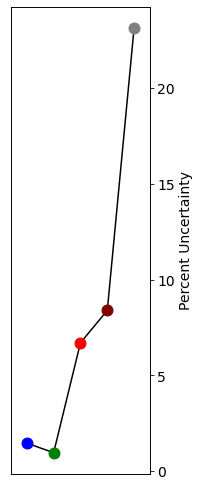

In [26]:
percent_diff_list = []
for i in range(5):
    percent_diff_list.append(np.std(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])) / np.mean(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])))

fig, ax = plt.subplots(figsize=(3,7))
ax.set_yticks([])
ax = ax.twinx()
colors=['blue', 'green', 'red', 'grey','maroon']
ax.plot([percent_diff_list[i]*100 for i in [0,1,2,4,3]], color='black',zorder=0)

for idx, i in enumerate([0,1,2,4,3]):
    ax.scatter(idx,percent_diff_list[i]*100, color=colors[i],s=120,zorder=1)
#     ax.axhline(stds_list[i]*100,color=colors[i])
plt.ylabel('Percent Uncertainty')
# plt.ylim(0,20)
plt.xlim(-0.6, 4.6)
ax.set_xticks([])
fig.tight_layout()
# plt.savefig('altum_uncertainty_per_band.png',dpi=300)
plt.show()

In [80]:
percent_diff_list = []
for i in range(3):
    percent_diff_list.append((uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i]) / np.mean(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i]))).values)

In [81]:
trios_percent_diff_list = []
for l,u,c in [[156,161,'blue'],[232,240,'green'],[346,351,'red']]:
    band_mean = static_trios_df.iloc[:, l:u].mean().mean()
    trios_percent_diff_list.append(static_trios_df.iloc[:, l:u].mean(axis=1).values/band_mean)

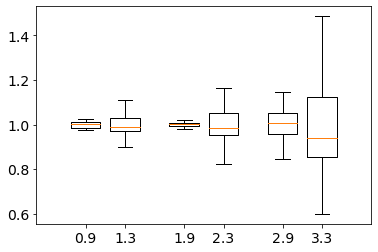

In [86]:
fig, ax = plt.subplots()
ax.boxplot(percent_diff_list, positions=[.9,1.9,2.9])
ax.boxplot(trios_percent_diff_list, positions=[1.3,2.3,3.3])
plt.show()

In [ ]:
percent_diff_list = []
for i in range(5):
    percent_diff_list.append(np.std(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])) / np.mean(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])))

fig, ax = plt.subplots(figsize=(3,7))
ax.set_yticks([])
ax = ax.twinx()
colors=['blue', 'green', 'red', 'grey','maroon']
ax.plot([percent_diff_list[i]*100 for i in [0,1,2,4,3]], color='black',zorder=0)

for idx, i in enumerate([0,1,2,4,3]):
    ax.scatter(idx,percent_diff_list[i]*100, color=colors[i],s=120,zorder=1)
#     ax.axhline(stds_list[i]*100,color=colors[i])
plt.ylabel('Percent Uncertainty')
# plt.ylim(0,20)
plt.xlim(-0.6, 4.6)
ax.set_xticks([])
fig.tight_layout()
# plt.savefig('altum_uncertainty_per_band.png',dpi=300)
plt.show()

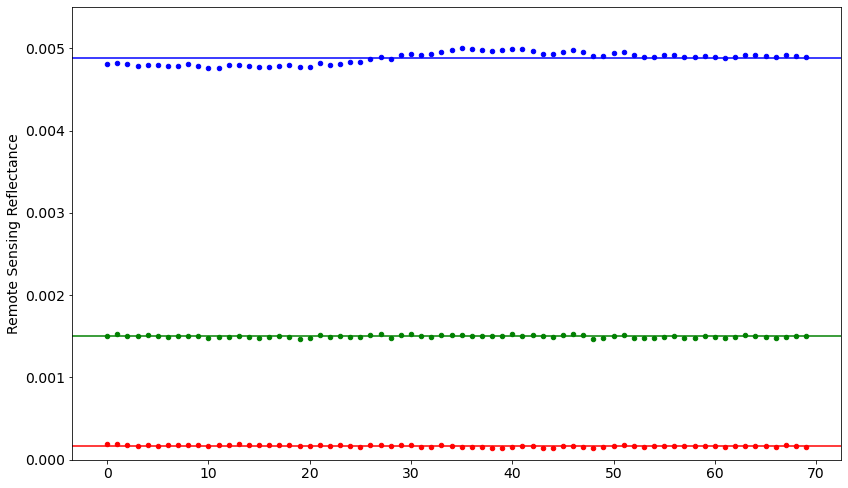

In [33]:
fig, ax = plt.subplots(figsize=(12,7))
for i,c in [[0,'blue'],[1,'green'],[2, 'red']]:
    ax.scatter(np.arange(0,len(uncert_gdf)),uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i]),color=c,s=20)
#     ax.plot(np.arange(0,len(uncert_gdf)),uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])+np.std(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])),color=c, ls='--')
#     ax.plot(np.arange(0,len(uncert_gdf)),uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])-np.std(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])),color=c, ls='--')
    ax.axhline(np.mean(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])),c=c)
ax.set_ylabel('Remote Sensing Reflectance')
# ax.set_ylim(0.000,0.01)
ax.set_ylim(0.000,0.0055)
# ax.set_ylim(0.000,0.0005)
fig.tight_layout()
# plt.savefig('altum_uncertainty_across_time_different_ylim.png',dpi=300)

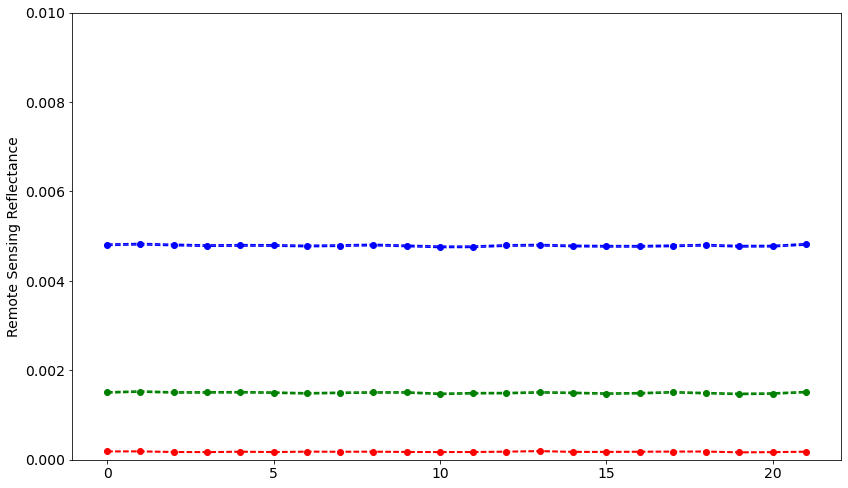

In [11]:
fig, ax = plt.subplots(figsize=(12,7))
for i,c in [[0,'blue'],[1,'green'],[2, 'red']]:
    ax.scatter(np.arange(0,22),uncert_gdf.iloc[:22].lw_spectra_float.map(lambda x: x[i]),color=c)
    ax.plot(np.arange(0,22),uncert_gdf.iloc[:22].lw_spectra_float.map(lambda x: x[i])+np.std(uncert_gdf.iloc[:22].lw_spectra_float.map(lambda x: x[i])),color=c, ls='--')
    ax.plot(np.arange(0,22),uncert_gdf.iloc[:22].lw_spectra_float.map(lambda x: x[i])-np.std(uncert_gdf.iloc[:22].lw_spectra_float.map(lambda x: x[i])),color=c, ls='--')
ax.set_ylabel('Remote Sensing Reflectance')
ax.set_ylim(0.000,0.01)
# ax.set_ylim(0.000,0.002)
# ax.set_ylim(0.000,0.0005)
fig.tight_layout()
plt.savefig('altum_uncertainty_across_time.png',dpi=300)

Now bring in the TriOS data and plot it together

In [15]:
! pwd

/home/clifgray/Code/ocean_color


In [17]:
! ls ../gs_front_analysis/data/ivan_cruise/trios

shearwater_trios_20210826.csv	    shearwater_trios_20210827.xlsx
shearwater_trios_20210826_ed.csv    shearwater_trios_20210828.csv
shearwater_trios_20210826_lsky.csv  shearwater_trios_20210828.xlsx
shearwater_trios_20210826_lt.csv    shearwater_trios_20210829.csv
shearwater_trios_20210826.xlsx	    shearwater_trios_20210829.xlsx
shearwater_trios_20210827.csv


In [18]:
trios_fns = [
    '../gs_front_analysis/data/ivan_cruise/trios/shearwater_trios_20210826.csv',
    '../gs_front_analysis/data/ivan_cruise/trios/shearwater_trios_20210827.csv',
    '../gs_front_analysis/data/ivan_cruise/trios/shearwater_trios_20210828.csv',
    '../gs_front_analysis/data/ivan_cruise/trios/shearwater_trios_20210829.csv',
            ]
trios_dfs = []
for fn in trios_fns:
    trios_dfs.append(pd.read_csv(fn))

trios_df = pd.DataFrame().append(trios_dfs)

In [19]:
trios_df['datetime'] = pd.to_datetime(trios_df['TimeStamp'])
trios_df['utc_dt'] =trios_df['datetime'] + timedelta(hours=4) # moving it to UTC
trios_df = trios_df.set_index('utc_dt')

In [20]:
static_trios_df = trios_df.loc['2021-08-26 19:46:00':'2021-08-26 19:55:00']
len(static_trios_df)

55

In [21]:
spec = []
for i in range(len(static_trios_df)):
    static_trios_df.iloc[i,1:-1] = static_trios_df.iloc[i,1:-1] - np.mean(static_trios_df.iloc[i,-250:-1])

/home/clifgray/anaconda3/envs/micasense_ocean_color/lib/python3.7/site-packages/pandas/core/indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [295]:
plt.rcParams.update({'font.size': 13.5})

0.0072548768461423874
0.002412524424324206
0.00041601846068784235
---
0.004877990772428573
0.001499571147142857
0.00016885339162857143


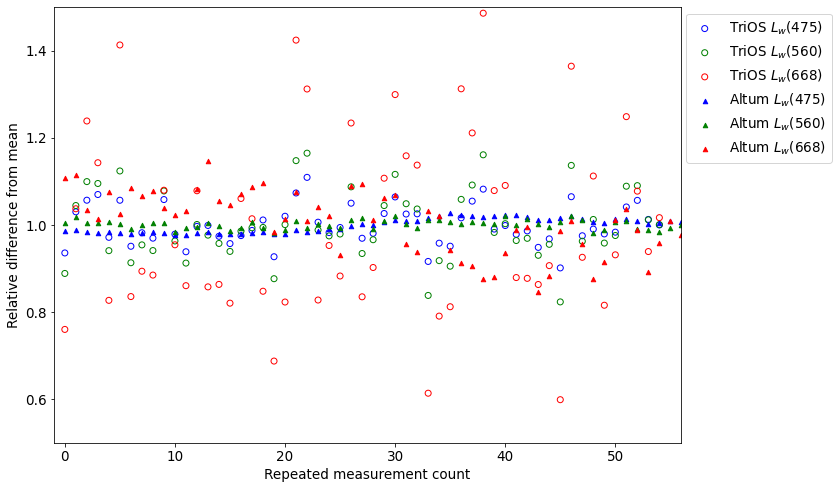

In [301]:
fig, ax = plt.subplots(figsize=(12,7))

### trios data

labels=['TriOS $L_w$(475)', 'TriOS $L_w$(560)', 'TriOS $L_w$(668)']

for i,l,u,c in [[0,156,161,'blue'],[1,232,240,'green'],[2,346,351,'red']]:
    band_mean = static_trios_df.iloc[:, l:u].mean().mean()
    print(band_mean)
    band_std = static_trios_df.iloc[:, l:u].mean(axis=1).std()
    
    
#     ax.axhline(band_mean/band_mean,color=c, ls='--')
#     ax.axhline(band_mean+band_std,color=c, ls='--')
#     ax.axhline(band_mean-band_std,color=c, ls='--')


    ax.scatter(range(len(static_trios_df)),static_trios_df.iloc[:, l:u].mean(axis=1)/band_mean,color=c, alpha=1, 
               facecolor='none', label=labels[i])
#     ax.scatter(range(len(static_trios_df)),static_trios_df.rolling(window=6).mean().iloc[:, l:u].mean(axis=1),color='silver', alpha=1)
#     ax.scatter(range(len(static_trios_df)),static_trios_df.rolling(window=6*3).mean().iloc[:, l:u].mean(axis=1),color='black', alpha=1)
labels=['Altum $L_w$(475)', 'Altum $L_w$(560)', 'Altum $L_w$(668)']

print("---")
# altum data
for i,c in [[0,'blue'],[1,'green'],[2, 'red']]:
    print(np.mean(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])))
    ax.scatter(np.arange(0,len(uncert_gdf)),uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])/np.mean(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])),
               marker='^',color=c,s=20, label=labels[i])
    
#     ax.axhline(np.mean(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i]))+np.std(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])),color=c, ls='--')
#     ax.axhline(np.mean(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i]))-np.std(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])),color=c, ls='--')
    
#     ax.axhline(np.mean(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])),c=c)

ax.set_ylim(0.5,1.5)
ax.set_xlim(-1,56)
ax.legend(bbox_to_anchor=(1.25, 1), loc='upper right')



ax.set_ylabel('Relative difference from mean')
ax.set_xlabel('Repeated measurement count')

fig.tight_layout()

fig.savefig('repeated_measurements_uas_trios_revision1.png',dpi=300)

Text(0.5, 0, 'Repeated measurement count')

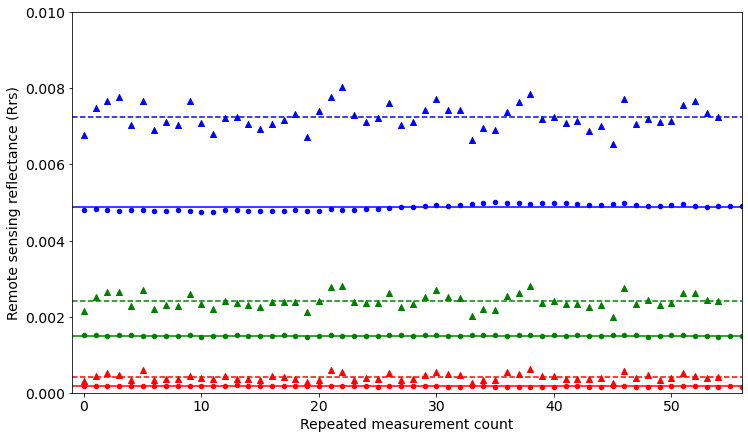

In [24]:
fig, ax = plt.subplots(figsize=(12,7))

for l,u,c in [[156,161,'blue'],[232,240,'green'],[346,351,'red']]:
    band_mean = static_trios_df.iloc[:, l:u].mean().mean()
    band_std = static_trios_df.iloc[:, l:u].mean(axis=1).std()
    
    
    ax.axhline(band_mean,color=c, ls='--')
#     ax.axhline(band_mean+band_std,color=c, ls='--')
#     ax.axhline(band_mean-band_std,color=c, ls='--')


    ax.scatter(range(len(static_trios_df)),static_trios_df.iloc[:, l:u].mean(axis=1),color=c, alpha=1, marker='^')
#     ax.scatter(range(len(static_trios_df)),static_trios_df.rolling(window=6).mean().iloc[:, l:u].mean(axis=1),color='silver', alpha=1)
#     ax.scatter(range(len(static_trios_df)),static_trios_df.rolling(window=6*3).mean().iloc[:, l:u].mean(axis=1),color='black', alpha=1)

for i,c in [[0,'blue'],[1,'green'],[2, 'red']]:
    ax.scatter(np.arange(0,len(uncert_gdf)),uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i]),color=c,s=20)
    
#     ax.axhline(np.mean(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i]))+np.std(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])),color=c, ls='--')
#     ax.axhline(np.mean(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i]))-np.std(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])),color=c, ls='--')
    
    ax.axhline(np.mean(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])),c=c)

ax.set_ylim(0,0.01)
ax.set_xlim(-1,56)

ax.set_ylabel('Remote sensing reflectance (Rrs)')
ax.set_xlabel('Repeated measurement count')
# fig.savefig('repeated_measurements_uas_trios.png',dpi=300)

In [203]:
blue_uncert = np.std(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[0]))
green_uncert = np.std(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[1]))
red_uncert = np.std(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[2]))
blue_uncert, green_uncert, red_uncert

(7.183649882211773e-05, 1.4519771838460445e-05, 1.1312350851544899e-05)

In [79]:
uncert_gdf.iloc[:22].lw_spectra_float.map(lambda x: x[0]).mean()

0.004788996155454546

In [82]:
! pip install uncertainties

     |████████████████████████████████| 98 kB 2.3 MB/s eta 0:00:011


In [83]:
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.

In [204]:
blue_u = ufloat(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[0]).mean(), blue_uncert)
green_u = ufloat(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[1]).mean(), green_uncert) 
red_u = ufloat(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[2]).mean(), red_uncert)

chla_u = oc_index(blue_u, green_u, red_u)

In [205]:
chla_u

0.1710075987301592+/-0.003396502377431248

In [206]:
chla_u.s/chla_u.nominal_value

0.019861704407596218

In [123]:
chla_u.s/chla_u.nominal_value

0.007291857550913465

0.0012726837554679123

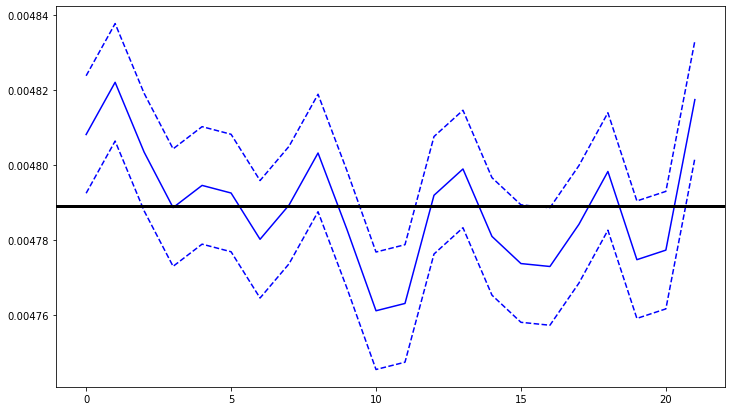

In [52]:
fig, ax = plt.subplots(figsize=(12,7))
for i,c in [[0,'blue']]:
    ax.plot(uncert_gdf.iloc[:22].lw_spectra_float.map(lambda x: x[i]),color=c)
    ax.plot(uncert_gdf.iloc[:22].lw_spectra_float.map(lambda x: x[i])+np.std(uncert_gdf.iloc[:22].lw_spectra_float.map(lambda x: x[i])),color=c, ls='--')
    ax.plot(uncert_gdf.iloc[:22].lw_spectra_float.map(lambda x: x[i])-np.std(uncert_gdf.iloc[:22].lw_spectra_float.map(lambda x: x[i])),color=c, ls='--')
ax.axhline(np.mean(uncert_gdf.iloc[:22].lw_spectra_float.map(lambda x: x[0])), color='black', lw=3)
# ax.set_ylim(0.004,0.0055)
# ax.set_ylim(0.000,0.002)

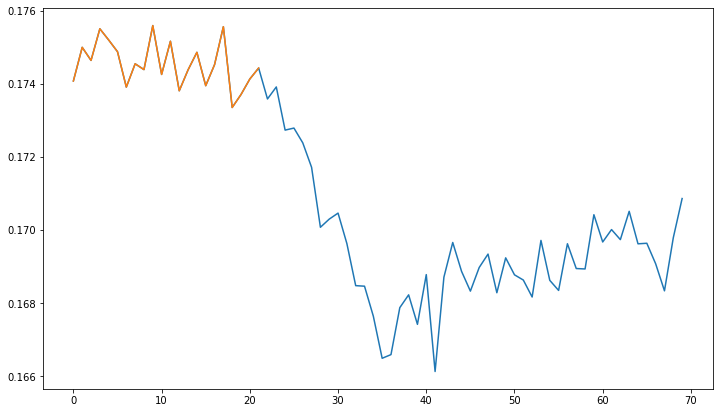

In [47]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(uncert_gdf.chla)
ax.plot(uncert_gdf.iloc[:22].chla)

In [8]:
np.array(uncert_gdf.lw_spectra_float)

array([array([0.00480806, 0.0015061 , 0.00018708, 0.00012701, 0.00013392]),
       array([0.00482198, 0.00152671, 0.00018818, 0.00012089, 0.00014066]),
       array([0.00480338, 0.00150561, 0.00017476, 0.00011602, 0.00013623]),
       array([0.00478857, 0.00150663, 0.00017126, 0.00010846, 0.00012719]),
       array([0.00479449, 0.00151034, 0.00018144, 0.00013606, 0.00013217]),
       array([0.00479246, 0.00150156, 0.00017307, 0.0001103 , 0.00013292]),
       array([0.00478012, 0.00148576, 0.00018296, 0.00016073, 0.00013457]),
       array([0.00478925, 0.00149823, 0.00018003, 0.00011325, 0.00013113]),
       array([0.00480313, 0.00150523, 0.00018217, 0.00011528, 0.00013363]),
       array([0.0047827 , 0.00150602, 0.00017543, 0.0001024 , 0.00013277]),
       array([0.00476106, 0.00147482, 0.00017269, 0.00013791, 0.0001307 ]),
       array([0.00476301, 0.00148832, 0.00017408, 0.00014192, 0.00013114]),
       array([0.00479185, 0.0014912 , 0.00018257, 0.00014254, 0.00013745]),
       array

(array([33., 10., 79., 93.,  3.,  2.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,
         0.,  1.,  1.,  0.,  2.,  1.,  5.]),
 array([0.15279598, 0.15911271, 0.16542945, 0.17174619, 0.17806293,
        0.18437967, 0.19069641, 0.19701314, 0.20332988, 0.20964662,
        0.21596336, 0.2222801 , 0.22859684, 0.23491357, 0.24123031,
        0.24754705, 0.25386379, 0.26018053, 0.26649727, 0.272814  ,
        0.27913074]),
 <BarContainer object of 20 artists>)

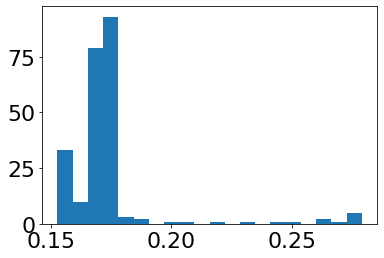

In [380]:
plt.hist(gdf0.chla,bins=20)

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


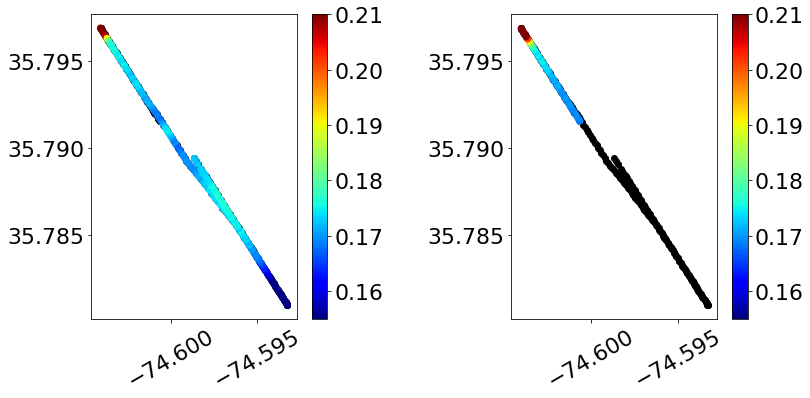

In [405]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
gdf0.plot('chla',ax=ax[0],vmin=0.155, vmax=.21, color='black', legend=True)
gdf0.plot('chla',ax=ax[1],vmin=0.155, vmax=.21, color='black', legend=True)


gdf0.iloc[50:].plot('chla',ax=ax[0],vmin=0.155, vmax=.21, cmap='jet', legend=True)
gdf0.iloc[:50].plot('chla',ax=ax[1],vmin=0.155, vmax=.21, cmap='jet', legend=True)


ax[0].tick_params(axis='x', rotation=30)
# ax.ticklabel_format(style='plain')
ax[0].ticklabel_format(useOffset=False, style='plain')

ax[1].tick_params(axis='x', rotation=30)
# ax.ticklabel_format(style='plain')
ax[1].ticklabel_format(useOffset=False, style='plain')

fig.tight_layout()

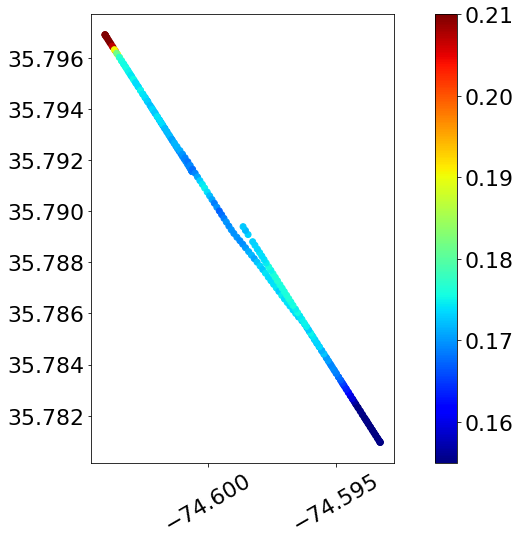

In [411]:
fig, ax = plt.subplots(figsize=(12,8))
gdf0.iloc[:].plot('chla',ax=ax,vmin=0.155, vmax=.21, cmap='jet', legend=True)

ax.tick_params(axis='x', rotation=30)
# ax.ticklabel_format(style='plain')
ax.ticklabel_format(useOffset=False, style='plain')

fig.tight_layout()
fig.savefig('gdf0_chla.png',dpi=300)

(array([ 32., 116., 106.,  44.,  13.,  12.,   5.,  25.,  39.,  15.]),
 array([0.11957445, 0.12515828, 0.1307421 , 0.13632593, 0.14190975,
        0.14749358, 0.1530774 , 0.15866123, 0.16424505, 0.16982887,
        0.1754127 ]),
 <BarContainer object of 10 artists>)

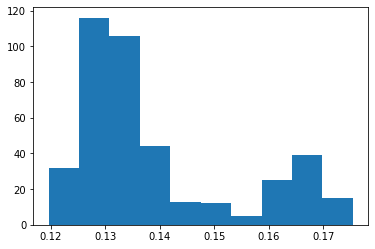

In [9]:
plt.hist(gdf1.chla)

<AxesSubplot:>

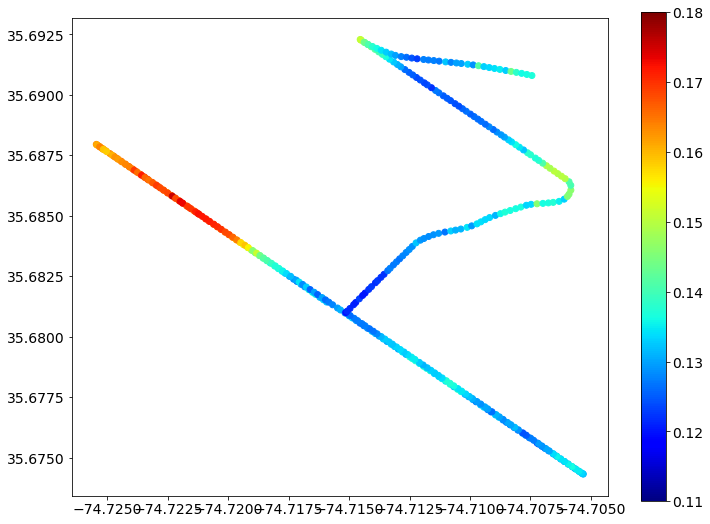

In [98]:
fig, ax = plt.subplots(figsize=(12,9))
# gdf1.iloc[:].plot('chla',ax=ax,vmin=0.11, vmax=.18, color='black', legend=True)
gdf1.iloc[:].plot('chla',ax=ax,vmin=0.11, vmax=.18, cmap='jet', alpha=1, legend=True)
# fig.savefig('gdf1_chla.png',dpi=300)

(array([ 16.,  11., 107., 104.,  29.,  25.,  15.,   3.,   1.,   2.]),
 array([0.16329076, 0.1663642 , 0.16943764, 0.17251107, 0.17558451,
        0.17865795, 0.18173139, 0.18480483, 0.18787826, 0.1909517 ,
        0.19402514]),
 <BarContainer object of 10 artists>)

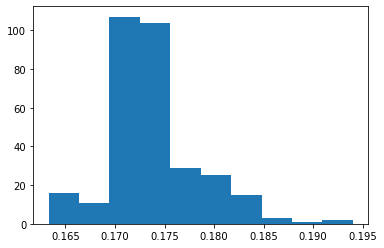

In [11]:
plt.hist(gdf2.chla)

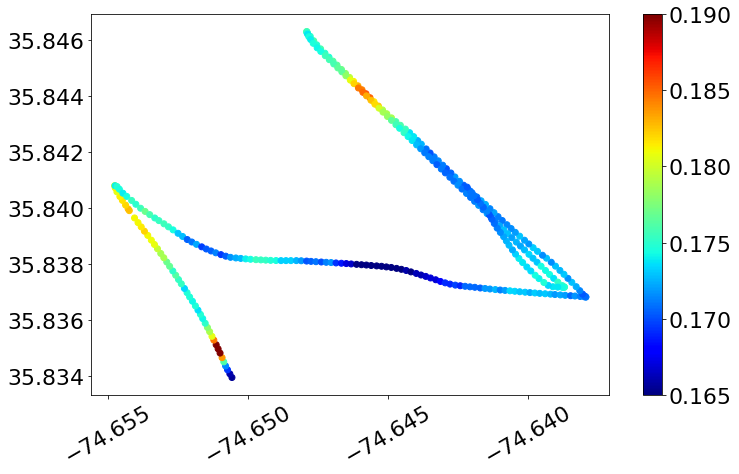

In [296]:
fig, ax = plt.subplots(figsize=(12,7))
gdf2.plot('chla',ax=ax,vmin=0.165, vmax=.19, cmap='jet', legend=True)
ax.tick_params(axis='x', rotation=30)
# ax.ticklabel_format(style='plain')
ax.ticklabel_format(useOffset=False, style='plain')

(array([24., 60., 51., 16.,  2.,  5.,  9., 10., 10.,  1.]),
 array([0.18932795, 0.19353786, 0.19774776, 0.20195767, 0.20616757,
        0.21037748, 0.21458738, 0.21879729, 0.22300719, 0.2272171 ,
        0.231427  ]),
 <BarContainer object of 10 artists>)

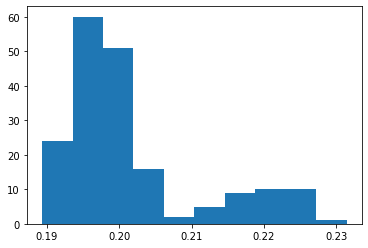

In [13]:
plt.hist(gdf3.chla)

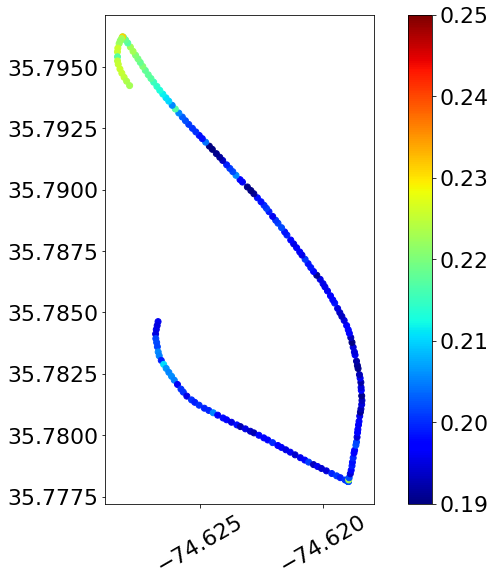

In [293]:
fig, ax = plt.subplots(figsize=(12,9))
gdf3.plot('chla',ax=ax,vmin=0.19, vmax=.25, cmap='jet', legend=True)
ax.tick_params(axis='x', rotation=30)
# ax.ticklabel_format(style='plain')
ax.ticklabel_format(useOffset=False, style='plain')

### Comparing to TriOS Data

In [146]:
def dms2dd(degrees, minutes, seconds, direction):
    dd = degrees + minutes/60 + seconds/(60*60);
    if direction == 'W' or direction == 'S':
        dd *= -1
    return dd;

In [147]:
ship_df = pd.read_csv('../gs_front_analysis_linux/data/ivan_data/tsg_gps/Navigation/SW-GGA_20210825-082425.Raw', index_col=None,
                 names=['date', 'time','spacer', 'idk', 'SW-GGA-Lat','latdir', 'SW-GGA-Long', 'londir', 'a','b','c','d','e','f','g'])

date_time_strs = ship_df['date'] + ' ' + ship_df['time']

ship_df['datetime'] = [datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S.%f') for x in date_time_strs]
# this was four minutes behind but with update to ship it is no longer
ship_df['utc_dt'] = ship_df['datetime']#+ timedelta(minutes=4)
ship_df  = ship_df.set_index('utc_dt')

ship_df['lon'] = dms2dd(pd.to_numeric(ship_df['SW-GGA-Long'].astype(str).str[:2]).astype(float), pd.to_numeric(ship_df['SW-GGA-Long'].astype(str).str[2:]),np.array(0), 'W')
ship_df['lat'] = dms2dd(pd.to_numeric(ship_df['SW-GGA-Lat'].astype(str).str[:2]).astype(float), pd.to_numeric(ship_df['SW-GGA-Lat'].astype(str).str[2:]),np.array(0), 'E')


ship_gdf = gpd.GeoDataFrame(
    ship_df, geometry=gpd.points_from_xy(ship_df.lon, ship_df.lat))

In [148]:
ship_gdf.head()

date          time  spacer       idk  \
utc_dt                                                                
2021-08-25 08:24:30.412  08/25/2021  08:24:30.412  $GPGGA  82741.69   
2021-08-25 08:24:31.506  08/25/2021  08:24:31.506  $GPGGA  82742.69   
2021-08-25 08:24:32.287  08/25/2021  08:24:32.287  $GPGGA  82743.70   
2021-08-25 08:24:33.709  08/25/2021  08:24:33.709  $GPGGA  82744.70   
2021-08-25 08:24:34.631  08/25/2021  08:24:34.631  $GPGGA  82745.70   

                         SW-GGA-Lat latdir  SW-GGA-Long londir  a   b    c  \
utc_dt                                                                       
2021-08-25 08:24:30.412   3443.0547      N    7640.2343      W  2  29  0.5   
2021-08-25 08:24:31.506   3443.0547      N    7640.2343      W  2  29  0.5   
2021-08-25 08:24:32.287   3443.0547      N    7640.2343      W  2  29  0.5   
2021-08-25 08:24:33.709   3443.0547      N    7640.2342      W  2  29  0.5   
2021-08-25 08:24:34.631   3443.0547      N    7640.2342      W  2  28  0.5   

                            d  e     f     g                datetime  \
utc_dt                                                                 
2021-08-25 08:24:30.412 -28.5  M -36.8  M*43 2021-08-25 08:24:30.412   
2021-08-25 08:24:31.506 -28.5  M -36.8  M*40 2021-08-25 08:24:31.506   
2021-08-25 08:24:32.287 -28.5  M -36.8  M*79 2021-08-25 08:24:32.287   
2021-08-25 08:24:33.709 -28.5  M -36.8  M*7F 2021-08-25 08:24:33.709   
2021-08-25 08:24:34.631 -28.4  M -36.8  M*7E 2021-08-25 08:24:34.631   

                               lon        lat                    geometry  
utc_dt                                                                     
2021-08-25 08:24:30.412 -76.670572  34.717578  POINT (-76.67057 34.71758)  
2021-08-25 08:24:31.506 -76.670572  34.717578  POINT (-76.67057 34.71758)  
2021-08-25 08:24:32.287 -76.670572  34.717578  POINT (-76.67057 34.71758)  
2021-08-25 08:24:33.709 -76.670570  34.717578  POINT (-76.67057 34.71758)  
2021-08-25 08:24:34.631 -76.670570  34.717578  POINT (-76.67057 34.71758)

<AxesSubplot:>

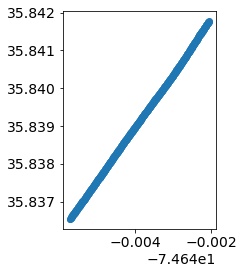

In [149]:
ship_gdf.loc['2021-08-27 19:12:27':'2021-08-27 19:22:47'].plot()

Pull in the trios data based on that day.

In [150]:
trios_fns = [
#     '../gs_front_analysis_linux/data/ivan_data/trios/shearwater_trios_20210826.csv',
    '../gs_front_analysis_linux/data/ivan_data/trios/shearwater_trios_20210827.csv',
#     '../gs_front_analysis_linux/data/ivan_data/trios/shearwater_trios_20210828.csv',

            ]
trios_dfs = []
for fn in trios_fns:
    trios_dfs.append(pd.read_csv(fn))

trios_df = pd.DataFrame().append(trios_dfs)

Combine the Ship GPS with TriOS based on time

In [151]:
trios_df['datetime'] = pd.to_datetime(trios_df['TimeStamp'])
trios_df['datetime'] = trios_df['datetime'] + timedelta(hours=4) # moving it to UTC
trios_df['utc_dt'] =trios_df['datetime'] 
trios_df = trios_df.set_index('utc_dt')

In [152]:
lats = []
lons = []
for i in range(len(trios_df)):
    item = trios_df.iloc[i]
    img_idx = ship_gdf.index.get_loc(item['datetime'], method='nearest')
    lats.append(ship_gdf.iloc[img_idx]['lat'])
    lons.append(ship_gdf.iloc[img_idx]['lon'])

In [153]:
trios_df['lat'] = lats
trios_df['lon'] = lons

<AxesSubplot:>

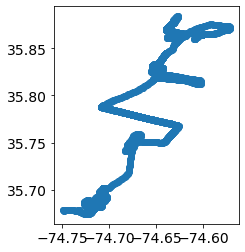

In [154]:
trios_gdf = gpd.GeoDataFrame(
    trios_df, geometry=gpd.points_from_xy(trios_df.lon, trios_df.lat))
trios_gdf.plot()

<AxesSubplot:>

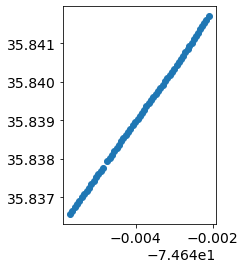

In [155]:
trios_gdf.loc['2021-08-27 19:12:27':'2021-08-27 19:22:47'].plot()

Trim the data to the flight time and closest locations.

In [156]:
trios_gdf_transect = trios_gdf#.loc[chla_gdf.iloc[0]['time']:chla_gdf.iloc[len(chla_gdf)-1]['time']]

In [157]:
from shapely.ops import nearest_points
# unary union of the gpd2 geomtries 
pts3 = trios_gdf_transect.geometry.unary_union

def near(point, pts=pts3):
    # find the nearest point and return the corresponding Place value
    nearest = trios_gdf_transect.geometry == nearest_points(point, pts)[1]
    return(trios_gdf_transect[nearest].lat.values[0])

gdf_all_flights['trios_lat'] = gdf_all_flights.apply(lambda row: near(row.geometry), axis=1)

def near(point, pts=pts3):
    # find the nearest point and return the corresponding Place value
    nearest = trios_gdf_transect.geometry == nearest_points(point, pts)[1]
    return(trios_gdf_transect[nearest].lon.values[0])

gdf_all_flights['trios_lon'] = gdf_all_flights.apply(lambda row: near(row.geometry), axis=1)
gdf_all_flights.head(2)

chla   Latitude  Longitude    sst  \
0  0.169086  35.791556 -74.600636  27.27   
1  0.166861  35.791556 -74.600636  27.24   

                                          lw_spectra             time_str  \
0  [4.88902001e-03 1.46889191e-03 1.40666728e-04 ...  2021-08-26 17:54:03   
1  [4.89128429e-03 1.43816144e-03 1.35672384e-04 ...  2021-08-26 17:54:05   

                     geometry   sst_c                time  flight  \
0  POINT (-74.60064 35.79156) -245.88 2021-08-26 17:54:03       3   
1  POINT (-74.60064 35.79156) -245.91 2021-08-26 17:54:05       3   

                                    lw_spectra_float  trios_lat  trios_lon  
0  [0.00488902001, 0.00146889191, 0.000140666728,...  35.811572 -74.604097  
1  [0.00489128429, 0.00143816144, 0.000135672384,...  35.811572 -74.604097

In [158]:
from shapely.ops import nearest_points
# unary union of the gpd2 geomtries 
pts3 = trios_gdf_transect.geometry.unary_union

def near(point, pts=pts3):
    # find the nearest point and return the corresponding Place value
    nearest = trios_gdf_transect.geometry == nearest_points(point, pts)[1]
    # need to index into columns by name
    return trios_gdf_transect[nearest][trios_gdf_transect.columns[1:-6]].values[0]

gdf_all_flights['trios_spec'] = gdf_all_flights.apply(lambda row: near(row.geometry), axis=1)
gdf_all_flights.head(2)

chla   Latitude  Longitude    sst  \
0  0.169086  35.791556 -74.600636  27.27   
1  0.166861  35.791556 -74.600636  27.24   

                                          lw_spectra             time_str  \
0  [4.88902001e-03 1.46889191e-03 1.40666728e-04 ...  2021-08-26 17:54:03   
1  [4.89128429e-03 1.43816144e-03 1.35672384e-04 ...  2021-08-26 17:54:05   

                     geometry   sst_c                time  flight  \
0  POINT (-74.60064 35.79156) -245.88 2021-08-26 17:54:03       3   
1  POINT (-74.60064 35.79156) -245.91 2021-08-26 17:54:05       3   

                                    lw_spectra_float  trios_lat  trios_lon  \
0  [0.00488902001, 0.00146889191, 0.000140666728,...  35.811572 -74.604097   
1  [0.00489128429, 0.00143816144, 0.000135672384,...  35.811572 -74.604097   

                                          trios_spec  
0  [0.0069607617, 0.0067700127, 0.0066798309, 0.0...  
1  [0.0069607617, 0.0067700127, 0.0066798309, 0.0...

In [159]:
trios_gdf_transect['chla_oci'] = oc_index(trios_gdf_transect.iloc[:, 156:161].mean(axis=1).values, trios_gdf_transect.iloc[:, 232:240].mean(axis=1).values, trios_gdf_transect.iloc[:, 346:351].mean(axis=1).values)

In [160]:
from shapely.ops import nearest_points
# unary union of the gpd2 geomtries 
pts3 = trios_gdf_transect.geometry.unary_union

def near(point, pts=pts3):
    # find the nearest point and return the corresponding Place value
    nearest = trios_gdf_transect.geometry == nearest_points(point, pts)[1]
    return trios_gdf_transect[nearest].chla_oci.values[0]

gdf_all_flights['trios_chla'] = gdf_all_flights.apply(lambda row: near(row.geometry), axis=1)
gdf_all_flights.head(2)

chla   Latitude  Longitude    sst  \
0  0.169086  35.791556 -74.600636  27.27   
1  0.166861  35.791556 -74.600636  27.24   

                                          lw_spectra             time_str  \
0  [4.88902001e-03 1.46889191e-03 1.40666728e-04 ...  2021-08-26 17:54:03   
1  [4.89128429e-03 1.43816144e-03 1.35672384e-04 ...  2021-08-26 17:54:05   

                     geometry   sst_c                time  flight  \
0  POINT (-74.60064 35.79156) -245.88 2021-08-26 17:54:03       3   
1  POINT (-74.60064 35.79156) -245.91 2021-08-26 17:54:05       3   

                                    lw_spectra_float  trios_lat  trios_lon  \
0  [0.00488902001, 0.00146889191, 0.000140666728,...  35.811572 -74.604097   
1  [0.00489128429, 0.00143816144, 0.000135672384,...  35.811572 -74.604097   

                                          trios_spec  trios_chla  
0  [0.0069607617, 0.0067700127, 0.0066798309, 0.0...    0.150112  
1  [0.0069607617, 0.0067700127, 0.0066798309, 0.0...    0.150112

In [161]:
from shapely.ops import nearest_points
# unary union of the gpd2 geomtries 
pts3 = trios_gdf_transect.geometry.unary_union

def near(point, pts=pts3):
    # find the nearest point and return the corresponding Place value
    nearest = trios_gdf_transect.geometry == nearest_points(point, pts)[1]
    return trios_gdf_transect[nearest].datetime.values[0]

gdf_all_flights['trios_datetime'] = gdf_all_flights.apply(lambda row: near(row.geometry), axis=1)
gdf_all_flights.head(2)

chla   Latitude  Longitude    sst  \
0  0.169086  35.791556 -74.600636  27.27   
1  0.166861  35.791556 -74.600636  27.24   

                                          lw_spectra             time_str  \
0  [4.88902001e-03 1.46889191e-03 1.40666728e-04 ...  2021-08-26 17:54:03   
1  [4.89128429e-03 1.43816144e-03 1.35672384e-04 ...  2021-08-26 17:54:05   

                     geometry   sst_c                time  flight  \
0  POINT (-74.60064 35.79156) -245.88 2021-08-26 17:54:03       3   
1  POINT (-74.60064 35.79156) -245.91 2021-08-26 17:54:05       3   

                                    lw_spectra_float  trios_lat  trios_lon  \
0  [0.00488902001, 0.00146889191, 0.000140666728,...  35.811572 -74.604097   
1  [0.00489128429, 0.00143816144, 0.000135672384,...  35.811572 -74.604097   

                                          trios_spec  trios_chla  \
0  [0.0069607617, 0.0067700127, 0.0066798309, 0.0...    0.150112   
1  [0.0069607617, 0.0067700127, 0.0066798309, 0.0...    0.150112   

       trios_datetime  
0 2021-08-27 18:08:20  
1 2021-08-27 18:08:20

In [162]:
import geopy.distance
def dist_fcn(sample_lat,sample_lon,uas_lat,uas_lon):
    coords_1 = (sample_lat, sample_lon)
    coords_2 = (uas_lat, uas_lon)
    return(geopy.distance.distance(coords_1, coords_2).km)
gdf_all_flights['pt_dist'] = gdf_all_flights.apply(lambda row: dist_fcn(row['Latitude'],row['Longitude'],row['trios_lat'],row['trios_lon']), axis=1)

(array([464., 194.,  62.,  42.,  67.,  71.,  87.,  63.,  42.,  50.]),
 array([1.42021631e-03, 3.54791190e-01, 7.08162163e-01, 1.06153314e+00,
        1.41490411e+00, 1.76827508e+00, 2.12164606e+00, 2.47501703e+00,
        2.82838800e+00, 3.18175898e+00, 3.53512995e+00]),
 <BarContainer object of 10 artists>)

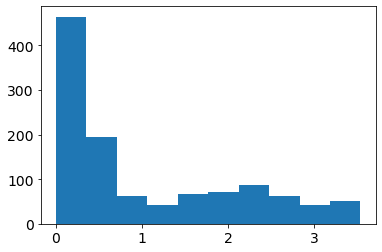

In [163]:
plt.hist(gdf_all_flights.pt_dist)

In [164]:
matched_subset = gdf_all_flights[gdf_all_flights.pt_dist < 0.05]
len(matched_subset)

108

In [165]:
matched_subset = matched_subset.iloc[:92]

In [166]:
duration = matched_subset.time - matched_subset.trios_datetime    # For build-in functions
duration_in_s = duration.dt.total_seconds()                         # Total number of seconds between dates

3000 seconds in hours

In [167]:
3000/60/24

2.0833333333333335

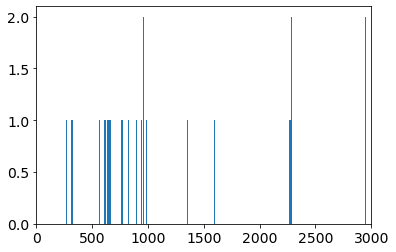

In [168]:
plt.hist(abs(duration_in_s),bins=1000)
plt.xlim(0,3000)
plt.show()

In [169]:
min(duration_in_s)/60/60

-0.8752777777777777

In [170]:
matched_subset['diff_in_sec'] = abs(duration_in_s.values)

In 8 minutes the water could be .72km away

In [171]:
4*1.5*60 

360.0

In [172]:
matched_subset = matched_subset[matched_subset.diff_in_sec < 60*30]
len(matched_subset)

61

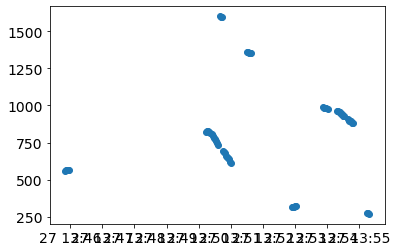

In [173]:
plt.scatter(matched_subset.time, matched_subset.diff_in_sec)

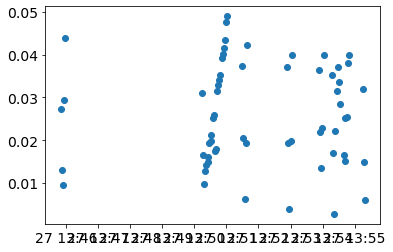

In [174]:
plt.scatter(matched_subset.time, matched_subset.pt_dist)

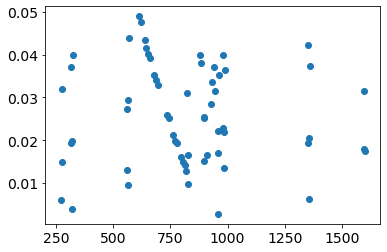

In [175]:
plt.scatter(matched_subset.diff_in_sec, matched_subset.pt_dist)

In [176]:
plt.rcParams.update({'font.size': 14})

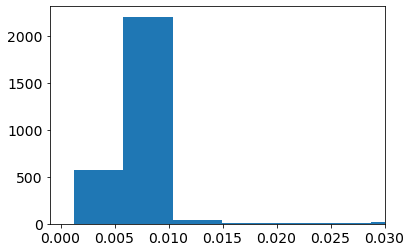

In [177]:
plt.hist(trios_gdf_transect['440'],bins=100)
plt.xlim(-0.001, 0.03)
plt.show()

(0.004, 0.0095)

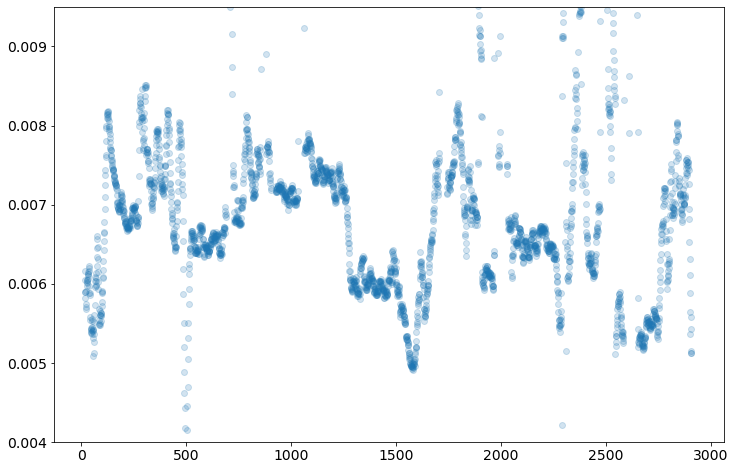

In [178]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(range(len(trios_gdf_transect)),trios_gdf_transect['440'].rolling(6*3).mean(), alpha=0.2)
ax.set_ylim(0.004, 0.0095)

Text(0.5, 0, 'Wavelength (nm)')

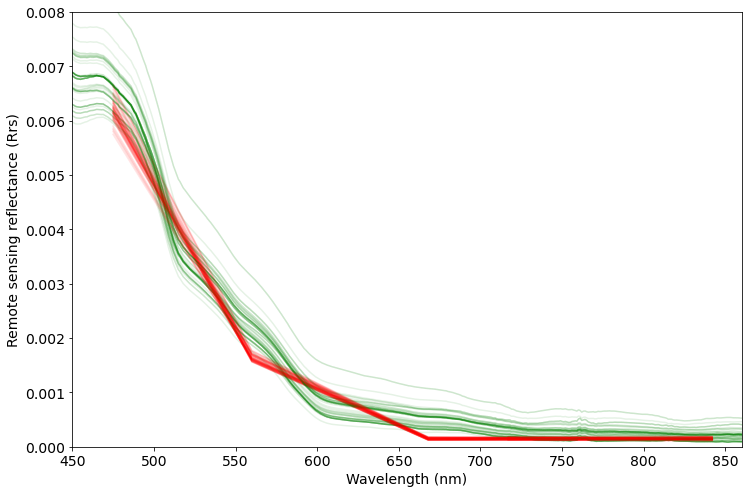

In [179]:
fig,ax = plt.subplots(figsize=(12,8))
for i in range(len(matched_subset)):
    ax.plot(trios_gdf_transect.columns[1:-7].astype(int),matched_subset.iloc[i].trios_spec, color='green', alpha=0.1)
    ax.plot([475, 560, 668, 842, 717],matched_subset.iloc[i].lw_spectra_float, color='red', alpha=0.1)
ax.set_xlim(450,860)
ax.set_ylim(0,0.008)
ax.set_ylabel('Remote sensing reflectance (Rrs)')
ax.set_xlabel('Wavelength (nm)')
# fig.savefig('comparing_trios_to_altum.png',dpi=300)

see if I can correct all the trios data down to ~0 in the red

In [185]:
trios_gdf_transect.columns[1:-7].astype(int)[-200:-150]

Int64Index([749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761,
            762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774,
            775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787,
            788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798],
           dtype='int64')

In [180]:
corrected_spec = []
for spec in matched_subset.trios_spec:
    nir_min = np.sort(spec[-100:])[:25]
    corrected_spec.append(spec - np.mean(nir_min))

In [181]:
np.min(spec[-50:])

-4.17895029918413e-05

In [182]:
spec[-100:].mean()

0.00013941744696692945

In [183]:
np.min(spec[-100:])

-4.17895029918413e-05

In [184]:
len(matched_subset)

61

Text(0.5, 0, 'Wavelength (nm)')

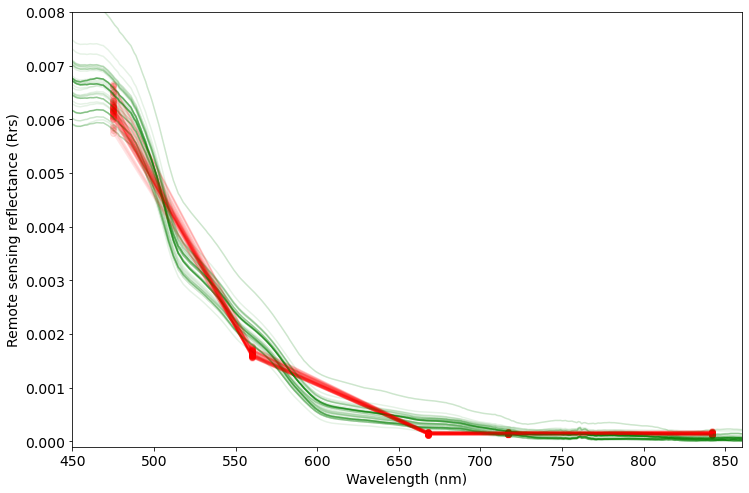

In [185]:
fig,ax = plt.subplots(figsize=(12,8))
for i in range(len(matched_subset)):
    ax.plot(trios_gdf_transect.columns[1:-7].astype(int),corrected_spec[i], color='green', alpha=0.1)
    ax.plot([475, 560, 668, 842, 717],matched_subset.iloc[i].lw_spectra_float, color='red', alpha=0.1)
    ax.scatter([475, 560, 668, 842, 717],matched_subset.iloc[i].lw_spectra_float, color='red', alpha=0.1)
ax.set_xlim(450,860)
ax.set_ylim(-0.0001,0.008)
ax.set_ylabel('Remote sensing reflectance (Rrs)')
ax.set_xlabel('Wavelength (nm)')
# fig.savefig('comparing_trios_to_altum.png',dpi=300)

Text(0.5, 0, 'Wavelength (nm)')

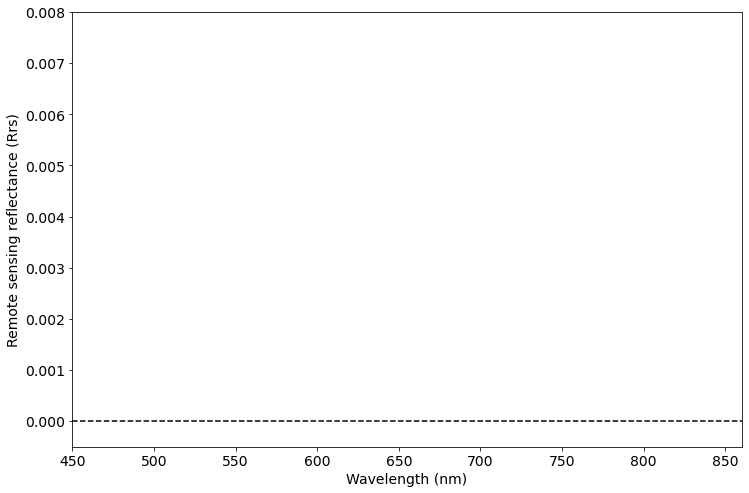

In [168]:
fig,ax = plt.subplots(figsize=(12,8))
for i in range(80,len(matched_subset)):
    ax.plot(trios_gdf_transect.columns[1:-7].astype(int),corrected_spec[i], color='green', alpha=0.1)
    ax.scatter([475, 560, 668, 842, 717],matched_subset.iloc[i].lw_spectra_float, color='red', alpha=0.1)
    
ax.axhline(0.0, color='black', ls='--')
ax.set_xlim(450,860)
ax.set_ylim(-0.0005,0.008)
ax.set_ylabel('Remote sensing reflectance (Rrs)')
ax.set_xlabel('Wavelength (nm)')
# fig.savefig('comparing_trios_to_altum.png',dpi=300)

In [186]:
matched_subset['corrected_trios'] = corrected_spec

(0.0, 0.001)

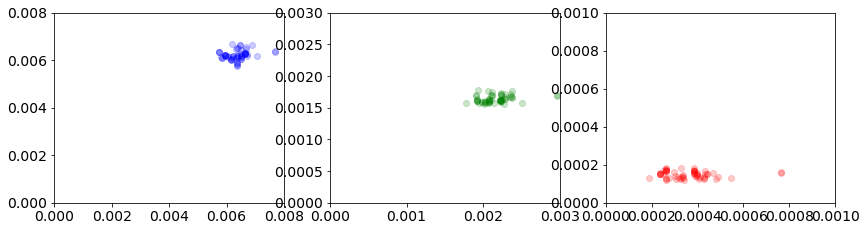

In [187]:
fig,ax = plt.subplots(1,3, figsize=(14,3.5))
for i in range(len(matched_subset)):
    ax[0].scatter(matched_subset.iloc[i].corrected_trios[156:161].mean(),matched_subset.iloc[i].lw_spectra_float[0], color='blue', alpha=0.2)
    ax[1].scatter(matched_subset.iloc[i].corrected_trios[232:240].mean(),matched_subset.iloc[i].lw_spectra_float[1], color='green', alpha=0.2)
    ax[2].scatter(matched_subset.iloc[i].corrected_trios[346:351].mean(),matched_subset.iloc[i].lw_spectra_float[2], color='red', alpha=0.2)
#     ax.plot(matched_subset.columns[1:-11].astype(int),matched_subset.iloc[i,1:-11], color='green', alpha=0.3)
#     ax.plot([475, 560, 668, 717, 842],matched_subset.iloc[i].uas_spec, color='red', alpha=0.2)
ax[0].set_xlim(0.000,0.008)
ax[0].set_ylim(0.000,0.008)

ax[1].set_xlim(0.000,0.003)
ax[1].set_ylim(0.000,0.003)

ax[2].set_xlim(0.000,0.001)
ax[2].set_ylim(0.000,0.001)
# ax.set_ylabel('Remote sensing reflectance (Rrs)')
# ax.set_xlabel('Wavelength (nm)')
# fig.savefig('comparing_trios_spectra_to_altum.png',dpi=300)

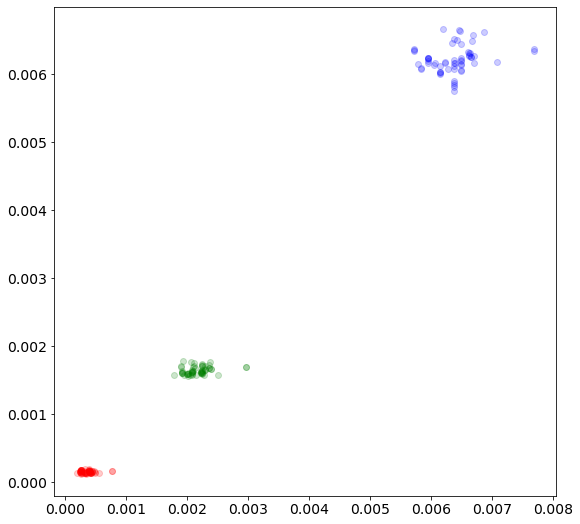

In [188]:
fig,ax = plt.subplots(figsize=(9,9))
for i in range(len(matched_subset)):
    ax.scatter(matched_subset.iloc[i].corrected_trios[156:161].mean(),matched_subset.iloc[i].lw_spectra_float[0], color='blue', alpha=0.2)
    ax.scatter(matched_subset.iloc[i].corrected_trios[232:240].mean(),matched_subset.iloc[i].lw_spectra_float[1], color='green', alpha=0.2)
    ax.scatter(matched_subset.iloc[i].corrected_trios[346:351].mean(),matched_subset.iloc[i].lw_spectra_float[2], color='red', alpha=0.2)
#     ax.plot(matched_subset.columns[1:-11].astype(int),matched_subset.iloc[i,1:-11], color='green', alpha=0.3)
#     ax.plot([475, 560, 668, 717, 842],matched_subset.iloc[i].uas_spec, color='red', alpha=0.2)
# ax[0].set_xlim(0.000,0.008)
# ax[0].set_ylim(0.000,0.008)

# ax[1].set_xlim(0.000,0.003)
# ax[1].set_ylim(0.000,0.003)

# ax[2].set_xlim(0.000,0.001)
# ax[2].set_ylim(0.000,0.001)
# ax.set_ylabel('Remote sensing reflectance (Rrs)')
# ax.set_xlabel('Wavelength (nm)')
# fig.savefig('comparing_trios_spectra_to_altum.png',dpi=300)

In [189]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(matched_subset.trios_chla, matched_subset.chla)

In [190]:
slope, intercept, r_value, p_value, std_err 

(0.3164359557214747,
 0.08119182034097105,
 0.37282664201289667,
 0.0030851950372484485,
 0.10253084351964989)

In [126]:
r_value**2

0.0039556210420824064

Text(0, 0.5, 'UAS Chla mg/m3')

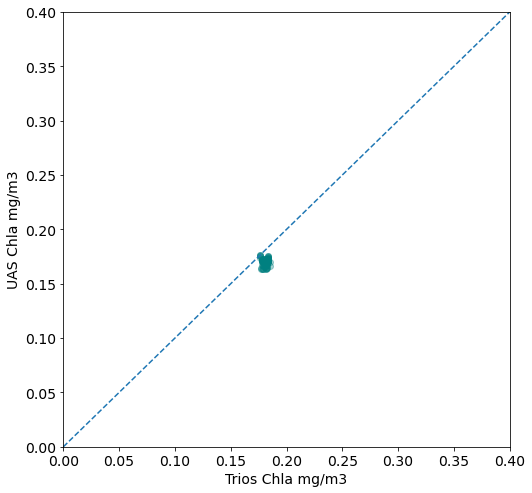

In [127]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(matched_subset.trios_chla, matched_subset.chla, alpha=0.35, color='teal')
ax.plot([0,1], [0,1], ls='--')
ax.set_xlim(.0,.4)
ax.set_ylim(.0,.4)
ax.set_xlabel('Trios Chla mg/m3')
ax.set_ylabel('UAS Chla mg/m3')
# fig.savefig('comparing_trios_uas_chla.png')

Do some comparisons

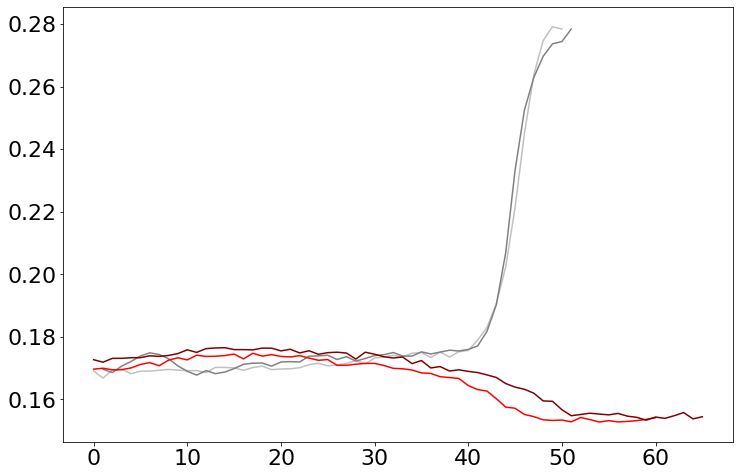

In [309]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(0,51,1), gdf0.iloc[:51].chla, color='silver')
ax.plot(np.arange(51,0,-1), gdf0.iloc[50:101].chla, color='grey')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax.plot(np.arange(0,61,1), gdf0.iloc[107:168].chla, color='red')
ax.plot(np.arange(65,-1,-1), gdf0.iloc[168:].chla, color='maroon')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

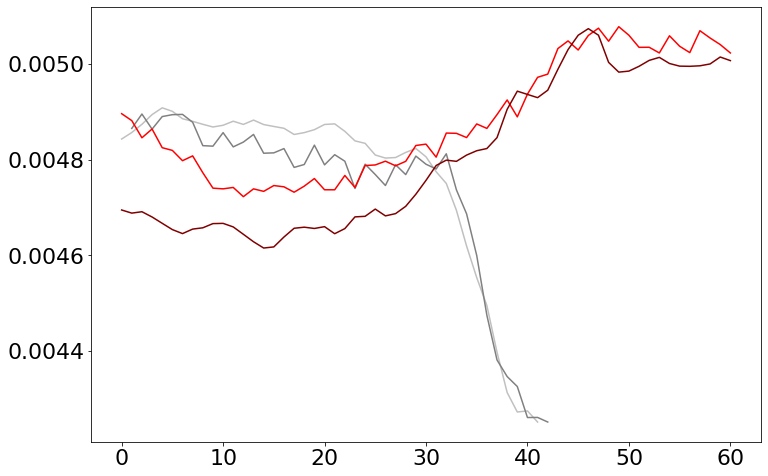

In [315]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(0,51-9,1), gdf0.iloc[9:51].lw_spectra_float.map(lambda x: x[0]), color='silver')
ax.plot(np.arange(51-9,0,-1), gdf0.iloc[50:101-9].lw_spectra_float.map(lambda x: x[0]), color='grey')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax.plot(np.arange(0,61,1), gdf0.iloc[107:168].lw_spectra_float.map(lambda x: x[0]), color='red')
ax.plot(np.arange(65-5,-1,-1), gdf0.iloc[168:-5].lw_spectra_float.map(lambda x: x[0]), color='maroon')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

In [332]:
plt.rcParams.update({'font.size': 15})

In [211]:
float(np.std(uncert_gdf.iloc[:].lw_spectra_float.map(lambda x: x[i])))

1.1312350851544899e-05

In [ ]:
0.000072

array([0.00425195, 0.00427523, 0.0042729 , 0.0043136 , 0.00439788,
       0.0044954 , 0.00455381, 0.00461974, 0.00469434, 0.00475055,
       0.00477509, 0.00480621, 0.00482361, 0.00481537, 0.00480472,
       0.00480362, 0.00481   , 0.00483437, 0.00483953, 0.00485948,
       0.00487507, 0.00487381, 0.00486296, 0.00485677, 0.00485291,
       0.00486586, 0.00486964, 0.00487364, 0.00488296, 0.00487392,
       0.00488062, 0.00487216, 0.00486854, 0.00487421, 0.00488033,
       0.00488581, 0.00490129, 0.00490861, 0.00489444, 0.00487419,
       0.00485698, 0.00484339])

In [230]:
stds_list

[7.183649882211773e-05,
 1.4519771838460445e-05,
 1.1312350851544899e-05,
 2.40048282267275e-05,
 1.047908321739266e-05]

In [14]:
import sys
sys.getsizeof(np.int8(123))

25

In [15]:
sys.getsizeof(np.float32(123))

28

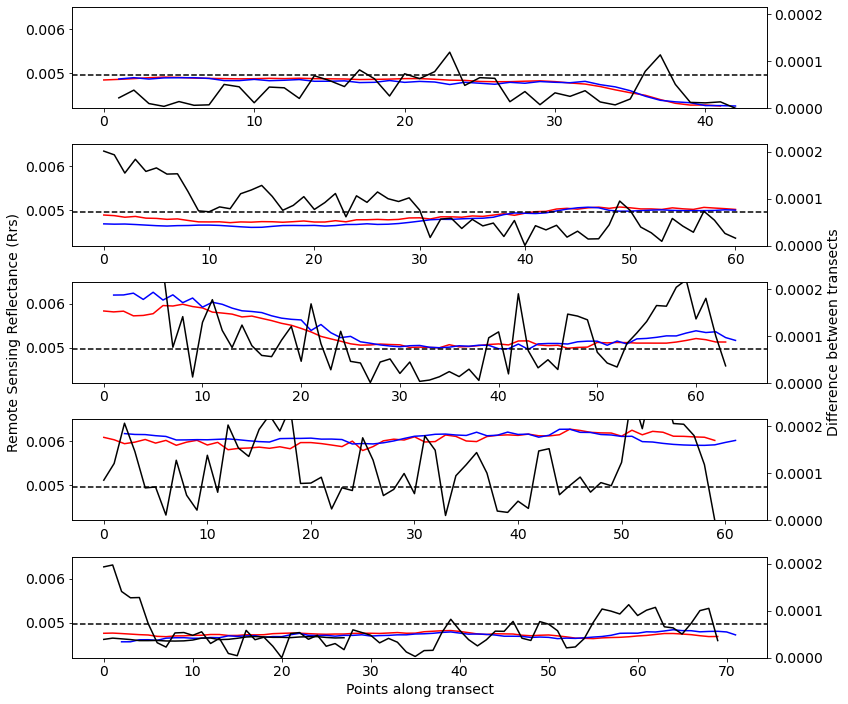

In [133]:
fig, ax = plt.subplots(5, figsize=(12,10))

ax[0].plot(np.arange(0,51-9,1), gdf0.iloc[9:51].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[0].plot(np.arange(51-9,0,-1), gdf0.iloc[50:101-9].lw_spectra_float.map(lambda x: x[0]), color='blue')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax1 = ax[0].twinx()
ax1.plot(np.arange(51-9,0,-1), abs(gdf0.iloc[50:101-9].lw_spectra_float.map(lambda x: x[0]).values-np.flip(gdf0.iloc[9:51].lw_spectra_float.map(lambda x: x[0]).values)), color='black')
ax1.axhline(stds_list[0],color='black', ls='--')
ax1.axhline(stds_list[0]*-1, color='black',ls='--')
ax1.set_ylim(0,stds_list[0]*3)
# ax1.plot(np.arange(0,51-9,1), gdf0.iloc[9:51].chla, color='red', ls='--')
# ax1.plot(np.arange(51-9,0,-1), gdf0.iloc[50:101-9].chla, color='blue', ls='--')

ax[1].plot(np.arange(0,61,1), gdf0.iloc[107:168].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[1].plot(np.arange(65-5,-1,-1), gdf0.iloc[168:-5].lw_spectra_float.map(lambda x: x[0]), color='blue')

ax1 = ax[1].twinx()
ax1.plot(np.arange(0,61,1), abs(gdf0.iloc[107:168].lw_spectra_float.map(lambda x: x[0]).values-np.flip(gdf0.iloc[168:-5].lw_spectra_float.map(lambda x: x[0]).values)), color='black')
ax1.set_ylim(0,stds_list[0]*3)
ax1.axhline(stds_list[0],color='black', ls='--')
ax1.axhline(stds_list[0]*-1, color='black',ls='--')

# ax1.plot(np.arange(0,64,1), gdf1.iloc[0:64].chla, color='red', ls='--')
# ax1.plot(np.arange(64,0,-1), gdf1.iloc[64:128].chla, color='blue', ls='--')

ax[2].plot(np.arange(0,64,1), gdf1.iloc[0:64].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[2].plot(np.arange(64,0,-1), gdf1.iloc[64:128].lw_spectra_float.map(lambda x: x[0]), color='blue')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax1 = ax[2].twinx()
ax1.plot(np.arange(0,64,1), abs(gdf1.iloc[0:64].lw_spectra_float.map(lambda x: x[0]).values-np.flip(gdf1.iloc[64:128].lw_spectra_float.map(lambda x: x[0]).values)), color='black')
ax1.set_ylim(0,stds_list[0]*3)
ax1.axhline(stds_list[0],color='black', ls='--')
ax1.axhline(stds_list[0]*-1, color='black',ls='--')
ax1.set_ylabel('Difference between transects')

ax[3].plot(np.arange(0,60,1), gdf1.iloc[135:195].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[3].plot(np.arange(61,1,-1), gdf1.iloc[195:255].lw_spectra_float.map(lambda x: x[0]), color='blue')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax1 = ax[3].twinx()
ax1.plot(np.arange(0,60,1), abs(gdf1.iloc[135:195].lw_spectra_float.map(lambda x: x[0]).values-np.flip(gdf1.iloc[195:255].lw_spectra_float.map(lambda x: x[0]).values)), color='black')
ax1.set_ylim(0,stds_list[0]*3)
ax1.axhline(stds_list[0],color='black', ls='--')
ax1.axhline(stds_list[0]*-1, color='black',ls='--')

ax[4].plot(np.arange(0,70,1), gdf2.iloc[145:215].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[4].plot(np.arange(71,1,-1), gdf2.iloc[215:285].lw_spectra_float.map(lambda x: x[0]), color='blue')
ax[4].plot(np.arange(0,28,1), gdf2.iloc[285:].lw_spectra_float.map(lambda x: x[0]), color='black')

ax1 = ax[4].twinx()
ax1.plot(np.arange(0,70,1), abs(gdf2.iloc[145:215].lw_spectra_float.map(lambda x: x[0]).values-np.flip(gdf2.iloc[215:285].lw_spectra_float.map(lambda x: x[0]).values)), color='black')
ax1.set_ylim(0,stds_list[0]*3)
ax1.axhline(stds_list[0],color='black', ls='--')
ax1.axhline(stds_list[0]*-1, color='black',ls='--')

ax[2].set_ylabel('Remote Sensing Reflectance (Rrs)')
ax[4].set_xlabel('Points along transect')

for i in range(5):
    ax[i].set_ylim(0.0042,0.0065)
fig.tight_layout()
# fig.savefig('oc_analysis_blue_comparison_overlap_with_mismatch_uncert.png',dpi=300)

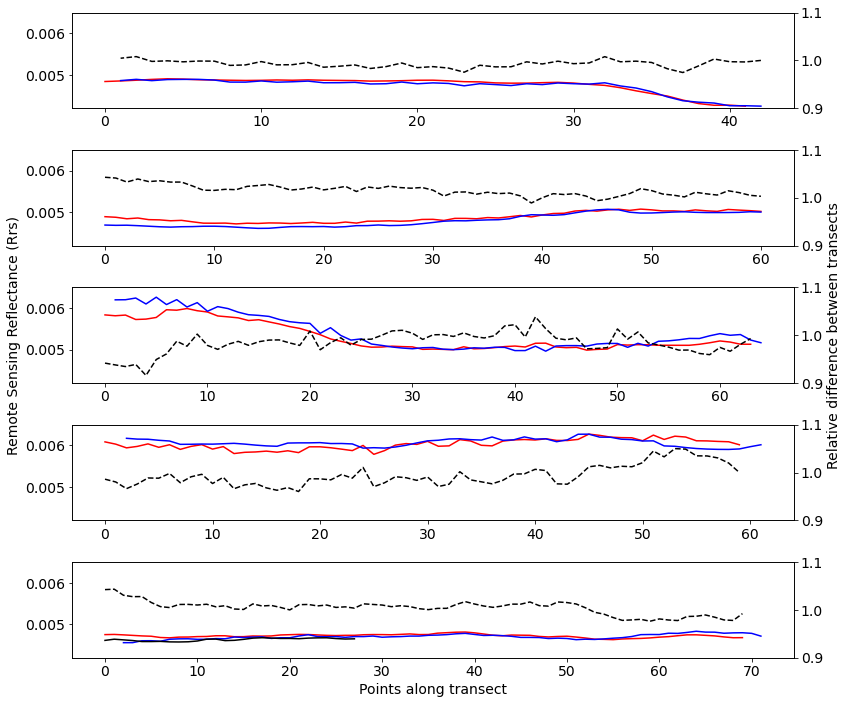

In [143]:
fig, ax = plt.subplots(5, figsize=(12,10))

ax[0].plot(np.arange(0,51-9,1), gdf0.iloc[9:51].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[0].plot(np.arange(51-9,0,-1), gdf0.iloc[50:101-9].lw_spectra_float.map(lambda x: x[0]), color='blue')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax1 = ax[0].twinx()
ax1.plot(np.arange(51-9,0,-1), abs(gdf0.iloc[50:101-9].lw_spectra_float.map(lambda x: x[0]).values/np.flip(gdf0.iloc[9:51].lw_spectra_float.map(lambda x: x[0]).values)), ls='--',color='black')
# ax1.axhline(stds_list[0],color='black', ls='--')
# ax1.axhline(stds_list[0]*-1, color='black',ls='--')
# ax1.set_ylim(0,stds_list[0]*3)
ax1.set_ylim(.9,1.1)
# ax1.plot(np.arange(0,51-9,1), gdf0.iloc[9:51].chla, color='red', ls='--')
# ax1.plot(np.arange(51-9,0,-1), gdf0.iloc[50:101-9].chla, color='blue', ls='--')

######

ax[1].plot(np.arange(0,61,1), gdf0.iloc[107:168].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[1].plot(np.arange(65-5,-1,-1), gdf0.iloc[168:-5].lw_spectra_float.map(lambda x: x[0]), color='blue')

ax1 = ax[1].twinx()
ax1.plot(np.arange(0,61,1), abs(gdf0.iloc[107:168].lw_spectra_float.map(lambda x: x[0]).values/np.flip(gdf0.iloc[168:-5].lw_spectra_float.map(lambda x: x[0]).values)), ls='--',color='black')
ax1.set_ylim(.9,1.1)

# ax1.plot(np.arange(0,64,1), gdf1.iloc[0:64].chla, color='red', ls='--')
# ax1.plot(np.arange(64,0,-1), gdf1.iloc[64:128].chla, color='blue', ls='--')

######

ax[2].plot(np.arange(0,64,1), gdf1.iloc[0:64].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[2].plot(np.arange(64,0,-1), gdf1.iloc[64:128].lw_spectra_float.map(lambda x: x[0]), color='blue')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax1 = ax[2].twinx()
ax1.plot(np.arange(0,64,1), abs(gdf1.iloc[0:64].lw_spectra_float.map(lambda x: x[0]).values/np.flip(gdf1.iloc[64:128].lw_spectra_float.map(lambda x: x[0]).values)), ls='--',color='black')
ax1.set_ylim(.9,1.1)
ax1.set_ylabel('Relative difference between transects')

######

ax[3].plot(np.arange(0,60,1), gdf1.iloc[135:195].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[3].plot(np.arange(61,1,-1), gdf1.iloc[195:255].lw_spectra_float.map(lambda x: x[0]), color='blue')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax1 = ax[3].twinx()
ax1.plot(np.arange(0,60,1), abs(gdf1.iloc[135:195].lw_spectra_float.map(lambda x: x[0]).values/np.flip(gdf1.iloc[195:255].lw_spectra_float.map(lambda x: x[0]).values)), ls='--',color='black')
ax1.set_ylim(.9,1.1)

######

ax[4].plot(np.arange(0,70,1), gdf2.iloc[145:215].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[4].plot(np.arange(71,1,-1), gdf2.iloc[215:285].lw_spectra_float.map(lambda x: x[0]), color='blue')
ax[4].plot(np.arange(0,28,1), gdf2.iloc[285:].lw_spectra_float.map(lambda x: x[0]), color='black')

ax1 = ax[4].twinx()
ax1.plot(np.arange(0,70,1), abs(gdf2.iloc[145:215].lw_spectra_float.map(lambda x: x[0]).values/np.flip(gdf2.iloc[215:285].lw_spectra_float.map(lambda x: x[0]).values)), ls='--', color='black')
ax1.set_ylim(.9,1.1)


ax[2].set_ylabel('Remote Sensing Reflectance (Rrs)')
ax[4].set_xlabel('Points along transect')

for i in range(5):
    ax[i].set_ylim(0.0042,0.0065)
fig.tight_layout()
fig.savefig('oc_analysis_blue_comparison_overlap_with_mismatch_uncert_revision1.png',dpi=300)

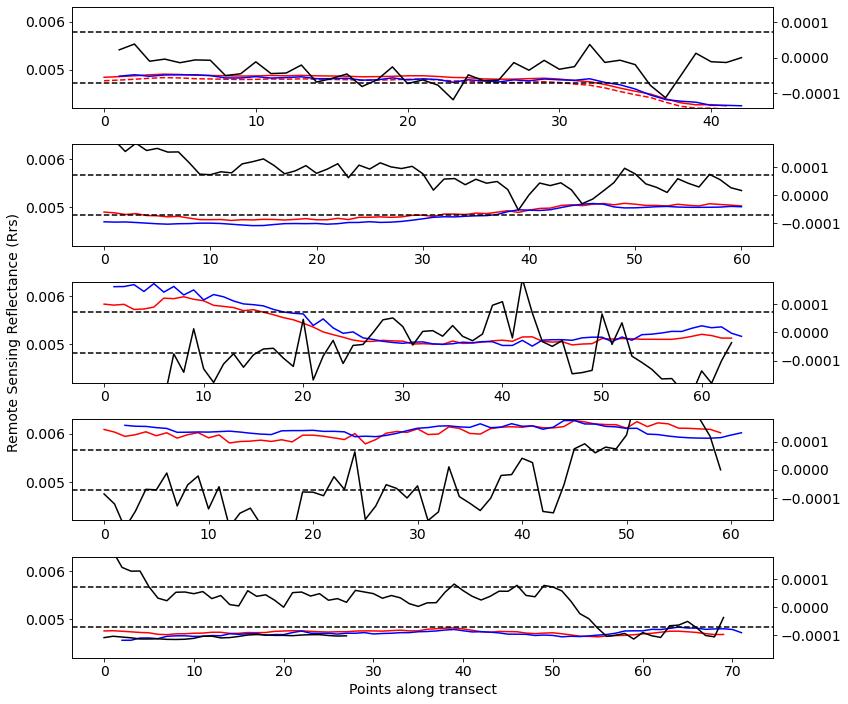

In [250]:
fig, ax = plt.subplots(5, figsize=(12,10))

ax[0].plot(np.arange(0,51-9,1), gdf0.iloc[9:51].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[0].plot(np.arange(0,51-9,1), gdf0.iloc[9:51].lw_spectra_float.map(lambda x: x[0])-stds_list[0], color='red',ls='--')
ax[0].plot(np.arange(51-9,0,-1), gdf0.iloc[50:101-9].lw_spectra_float.map(lambda x: x[0]), color='blue')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')
ax1 = ax[0].twinx()
ax1.plot(np.arange(51-9,0,-1), gdf0.iloc[50:101-9].lw_spectra_float.map(lambda x: x[0]).values-np.flip(gdf0.iloc[9:51].lw_spectra_float.map(lambda x: x[0]).values), color='black')
ax1.axhline(stds_list[0],color='black', ls='--')
ax1.axhline(stds_list[0]*-1, color='black',ls='--')
ax1.set_ylim(-stds_list[0]*2,stds_list[0]*2)
# ax1.plot(np.arange(0,51-9,1), gdf0.iloc[9:51].chla, color='red', ls='--')
# ax1.plot(np.arange(51-9,0,-1), gdf0.iloc[50:101-9].chla, color='blue', ls='--')

ax[1].plot(np.arange(0,61,1), gdf0.iloc[107:168].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[1].plot(np.arange(65-5,-1,-1), gdf0.iloc[168:-5].lw_spectra_float.map(lambda x: x[0]), color='blue')

ax1 = ax[1].twinx()
ax1.plot(np.arange(0,61,1), gdf0.iloc[107:168].lw_spectra_float.map(lambda x: x[0]).values-np.flip(gdf0.iloc[168:-5].lw_spectra_float.map(lambda x: x[0]).values), color='black')
ax1.set_ylim(-stds_list[0]*2.5,stds_list[0]*2.5)
ax1.axhline(stds_list[0],color='black', ls='--')
ax1.axhline(stds_list[0]*-1, color='black',ls='--')

# ax1.plot(np.arange(0,64,1), gdf1.iloc[0:64].chla, color='red', ls='--')
# ax1.plot(np.arange(64,0,-1), gdf1.iloc[64:128].chla, color='blue', ls='--')

ax[2].plot(np.arange(0,64,1), gdf1.iloc[0:64].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[2].plot(np.arange(64,0,-1), gdf1.iloc[64:128].lw_spectra_float.map(lambda x: x[0]), color='blue')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax1 = ax[2].twinx()
ax1.plot(np.arange(0,64,1), gdf1.iloc[0:64].lw_spectra_float.map(lambda x: x[0]).values-np.flip(gdf1.iloc[64:128].lw_spectra_float.map(lambda x: x[0]).values), color='black')
ax1.set_ylim(-stds_list[0]*2.5,stds_list[0]*2.5)
ax1.axhline(stds_list[0],color='black', ls='--')
ax1.axhline(stds_list[0]*-1, color='black',ls='--')

ax[3].plot(np.arange(0,60,1), gdf1.iloc[135:195].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[3].plot(np.arange(61,1,-1), gdf1.iloc[195:255].lw_spectra_float.map(lambda x: x[0]), color='blue')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax1 = ax[3].twinx()
ax1.plot(np.arange(0,60,1), gdf1.iloc[135:195].lw_spectra_float.map(lambda x: x[0]).values-np.flip(gdf1.iloc[195:255].lw_spectra_float.map(lambda x: x[0]).values), color='black')
ax1.set_ylim(-stds_list[0]*2.5,stds_list[0]*2.5)
ax1.axhline(stds_list[0],color='black', ls='--')
ax1.axhline(stds_list[0]*-1, color='black',ls='--')

ax[4].plot(np.arange(0,70,1), gdf2.iloc[145:215].lw_spectra_float.map(lambda x: x[0]), color='red')
ax[4].plot(np.arange(71,1,-1), gdf2.iloc[215:285].lw_spectra_float.map(lambda x: x[0]), color='blue')
ax[4].plot(np.arange(0,28,1), gdf2.iloc[285:].lw_spectra_float.map(lambda x: x[0]), color='black')

ax1 = ax[4].twinx()
ax1.plot(np.arange(0,70,1), gdf2.iloc[145:215].lw_spectra_float.map(lambda x: x[0]).values-np.flip(gdf2.iloc[215:285].lw_spectra_float.map(lambda x: x[0]).values), color='black')
ax1.set_ylim(-stds_list[0]*2.5,stds_list[0]*2.5)
ax1.axhline(stds_list[0],color='black', ls='--')
ax1.axhline(stds_list[0]*-1, color='black',ls='--')

ax[2].set_ylabel('Remote Sensing Reflectance (Rrs)')
ax[4].set_xlabel('Points along transect')

for i in range(5):
    ax[i].set_ylim(0.0042,0.0063)
fig.tight_layout()
# fig.savefig('oc_analysis_blue_comparison_overlap_with_mismatch_uncert.png',dpi=300)

Text(0.5, 0, 'Points along transect')

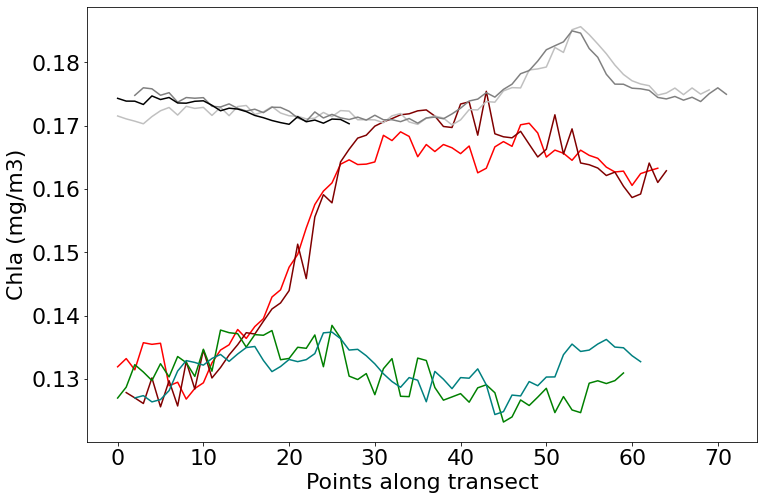

In [305]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(0,64,1), gdf1.iloc[0:64].chla, color='red')
ax.plot(np.arange(64,0,-1), gdf1.iloc[64:128].chla, color='maroon')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax.plot(np.arange(0,60,1), gdf1.iloc[135:195].chla, color='green')
ax.plot(np.arange(61,1,-1), gdf1.iloc[195:255].chla, color='teal')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

# ax.set_ylim(0.235,0.276)

ax.plot(np.arange(0,70,1), gdf2.iloc[145:215].chla, color='silver')
ax.plot(np.arange(71,1,-1), gdf2.iloc[215:285].chla, color='grey')
ax.plot(np.arange(0,28,1), gdf2.iloc[285:].chla, color='black')

ax.set_ylabel('Chla (mg/m3)')
ax.set_xlabel('Points along transect')
# fig.savefig('oc_analysis_20210827_A1_gulf_stream_surveys_chla_comparison_overlap.png')

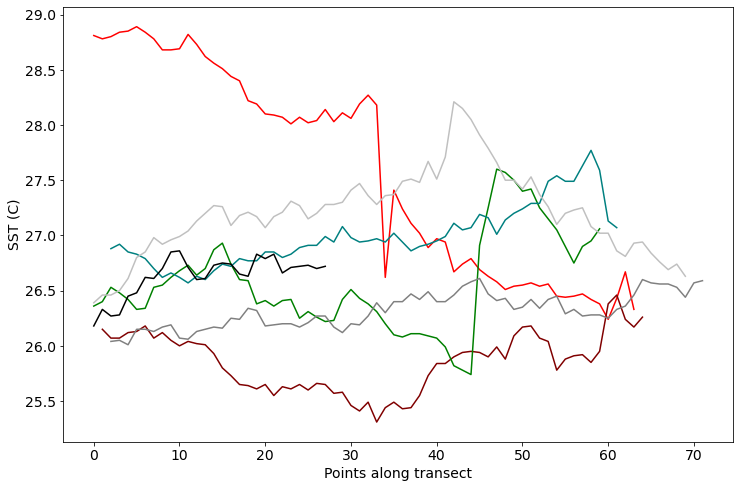

In [275]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(0,64,1), gdf1.iloc[0:64].sst, color='red')
ax.plot(np.arange(64,0,-1), gdf1.iloc[64:128].sst, color='maroon')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax.plot(np.arange(0,60,1), gdf1.iloc[135:195].sst, color='green')
ax.plot(np.arange(61,1,-1), gdf1.iloc[195:255].sst, color='teal')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

# ax.set_ylim(0.235,0.276)

ax.plot(np.arange(0,70,1), gdf2.iloc[145:215].sst, color='silver')
ax.plot(np.arange(71,1,-1), gdf2.iloc[215:285].sst, color='grey')
ax.plot(np.arange(0,28,1), gdf2.iloc[285:].sst, color='black')

ax.set_ylabel('SST (C)')
ax.set_xlabel('Points along transect')
fig.savefig('oc_analysis_20210827_A1_gulf_stream_surveys_sst_comparison_overlap.png')

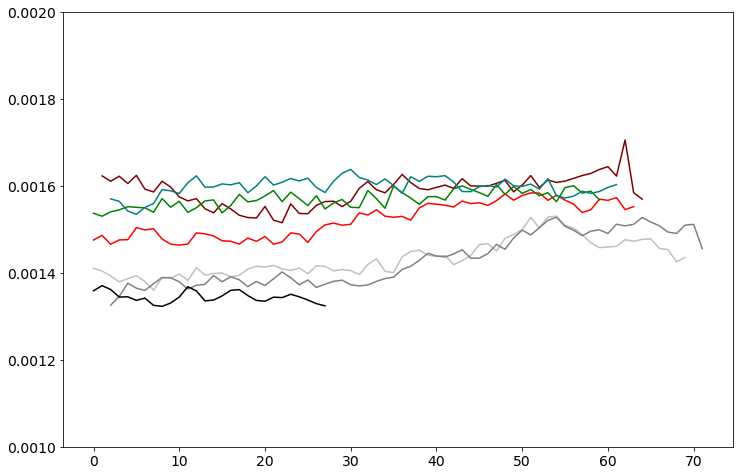

In [110]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(0,64,1), gdf1.iloc[0:64].green, color='red')
ax.plot(np.arange(64,0,-1), gdf1.iloc[64:128].green, color='maroon')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax.plot(np.arange(0,60,1), gdf1.iloc[135:195].green, color='green')
ax.plot(np.arange(61,1,-1), gdf1.iloc[195:255].green, color='teal')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax.set_ylim(0.001,0.002)

ax.plot(np.arange(0,70,1), gdf2.iloc[145:215].green, color='silver')
ax.plot(np.arange(71,1,-1), gdf2.iloc[215:285].green, color='grey')
ax.plot(np.arange(0,28,1), gdf2.iloc[285:].green, color='black')

# fig.savefig('oc_analysis_20210827_A1_gulf_stream_surveys_comparison_overlap.png')

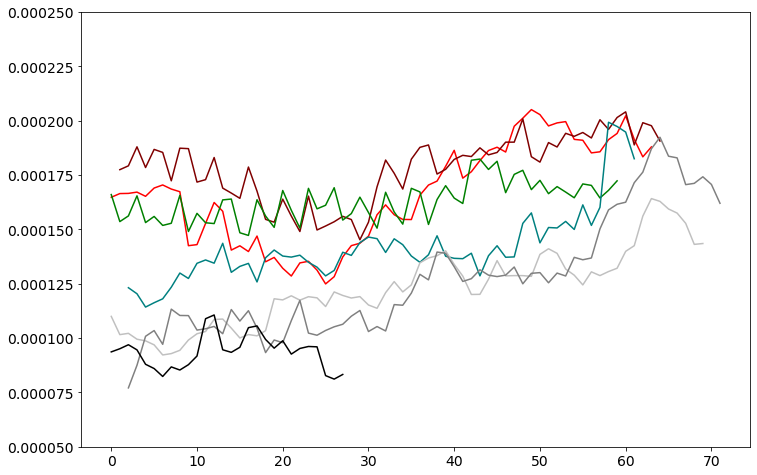

In [113]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(0,64,1), gdf1.iloc[0:64].red, color='red')
ax.plot(np.arange(64,0,-1), gdf1.iloc[64:128].red, color='maroon')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax.plot(np.arange(0,60,1), gdf1.iloc[135:195].red, color='green')
ax.plot(np.arange(61,1,-1), gdf1.iloc[195:255].red, color='teal')
# ax.plot(np.arange(0,28,1), chla_gdf.iloc[285:].chla, color='black')

ax.set_ylim(0.00005,0.00025)

ax.plot(np.arange(0,70,1), gdf2.iloc[145:215].red, color='silver')
ax.plot(np.arange(71,1,-1), gdf2.iloc[215:285].red, color='grey')
ax.plot(np.arange(0,28,1), gdf2.iloc[285:].red, color='black')

# fig.savefig('oc_analysis_20210827_A1_gulf_stream_surveys_comparison_overlap.png')

In [118]:
mgdf_copy = matched_subset.copy()
mgdf_copy['time_str'] = mgdf_copy['time'].astype(str)
mgdf_copy['trios_datetime_str'] = mgdf_copy['trios_datetime'].astype(str)
mgdf_copy['lw_spectra_float'] = mgdf_copy['lw_spectra_float'].astype(str)
mgdf_copy['trios_spec'] = mgdf_copy['trios_spec'].astype(str)
mgdf_copy['corrected_trios'] = mgdf_copy['corrected_trios'].astype(str)
mgdf_copy.drop('time', 1).drop('trios_datetime', 1).to_file('data/matched_trios_uas_gulf_stream_surveys.shp')

### Sat Data

In [7]:
! ls data/*nc

data/SEAHAWK1_HAWKEYE.20210909T152714.L2.OC.nc
data/V2021239182400.L2_SNPP_OC.nc
data/V2021240171200.L2_JPSS1_OC.nc
data/V2021240180600.L2_SNPP_OC.nc


In [191]:
1+1

2

Day 239 is 8/27 and day 240 is 8/28

In [201]:
# viirs_ds = xr.open_dataset('VRSUCW_2021117_DAILY_SNPP_CHLORA_SE_750M.nc4')

# fn = 'data/V2021239182400.L2_SNPP_OC.nc'
fn = 'data/V2021240180600.L2_SNPP_OC.nc'

#fn = 'data/AQUA_MODIS.20210427T183000.L2.SST.NRT.nc'
dataset = Dataset(fn)
gd=dataset.groups['geophysical_data']
nav=dataset.groups['navigation_data']
lons = nav.variables["longitude"][:]
lats = nav.variables["latitude"][:]

flags= gd.variables["l2_flags"][:]
print(gd.variables.keys())
# # create the chl dataset
chl_ds = xr.Dataset({'chlor_a':(('x', 'y'),gd.variables['chlor_a'][:].data)},
                    coords = {'lat': (('x', 'y'), lats),
                              'lon': (('x', 'y'), lons)},
                    attrs={'variable':'Chlorophyll-a'})
chl_ds = chl_ds.where(chl_ds['chlor_a'] != -32767.0)
chl_ds
# # # create the chl dataset
# sst_ds = xr.Dataset({'sst':(('x', 'y'),gd.variables['sst'][:].data)},
#                     coords = {'lat': (('x', 'y'), lats),
#                               'lon': (('x', 'y'), lons)},
#                     attrs={'variable':'SST'})
# sst_ds = sst_ds.where(sst_ds['sst'] != -32767.0)
# sst_ds

dict_keys(['aot_862', 'angstrom', 'Rrs_410', 'Rrs_443', 'Rrs_486', 'Rrs_551', 'Rrs_671', 'chlor_a', 'chl_ocx', 'Kd_490', 'pic', 'poc', 'par', 'l2_flags'])


<xarray.Dataset>
Dimensions:  (x: 3232, y: 3200)
Coordinates:
    lat      (x, y) float32 33.3 33.3 33.3 33.3 33.3 ... 47.56 47.55 47.55 47.54
    lon      (x, y) float32 -59.4 -59.42 -59.44 -59.45 ... -103.3 -103.3 -103.4
Dimensions without coordinates: x, y
Data variables:
    chlor_a  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    variable:  Chlorophyll-a

In [202]:
rrs_ds = xr.Dataset({'Rrs_410':(('x', 'y'),gd.variables['Rrs_410'][:].data)},
                    coords = {'lat': (('x', 'y'), lats),
                              'lon': (('x', 'y'), lons)},
                    attrs={'variable':'Rrs_410'})
rrs_ds = rrs_ds.where(rrs_ds['Rrs_410'] > -100.0)
rrs_ds = rrs_ds.where(rrs_ds['Rrs_410'] > -100.0)

rrs_ds

<xarray.Dataset>
Dimensions:  (x: 3232, y: 3200)
Coordinates:
    lat      (x, y) float32 33.3 33.3 33.3 33.3 33.3 ... 47.56 47.55 47.55 47.54
    lon      (x, y) float32 -59.4 -59.42 -59.44 -59.45 ... -103.3 -103.3 -103.4
Dimensions without coordinates: x, y
Data variables:
    Rrs_410  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    variable:  Rrs_410

In [203]:
for i in ['Rrs_443', 'Rrs_486', 'Rrs_551', 'Rrs_671']:
    rrs_ds_tmp = xr.Dataset({i:(('x', 'y'),gd.variables[i][:].data)},
                        coords = {'lat': (('x', 'y'), lats),
                                  'lon': (('x', 'y'), lons)},
                        attrs={'variable':i})
    rrs_ds_tmp = rrs_ds_tmp.where(rrs_ds_tmp[i] > -100.0)
    rrs_ds_tmp = rrs_ds_tmp.where(rrs_ds_tmp[i] > -100.0)
    rrs_ds[i] = rrs_ds_tmp[i]
rrs_ds

<xarray.Dataset>
Dimensions:  (x: 3232, y: 3200)
Coordinates:
    lat      (x, y) float32 33.3 33.3 33.3 33.3 33.3 ... 47.56 47.55 47.55 47.54
    lon      (x, y) float32 -59.4 -59.42 -59.44 -59.45 ... -103.3 -103.3 -103.4
Dimensions without coordinates: x, y
Data variables:
    Rrs_410  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    Rrs_443  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    Rrs_486  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    Rrs_551  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    Rrs_671  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    variable:  Rrs_410

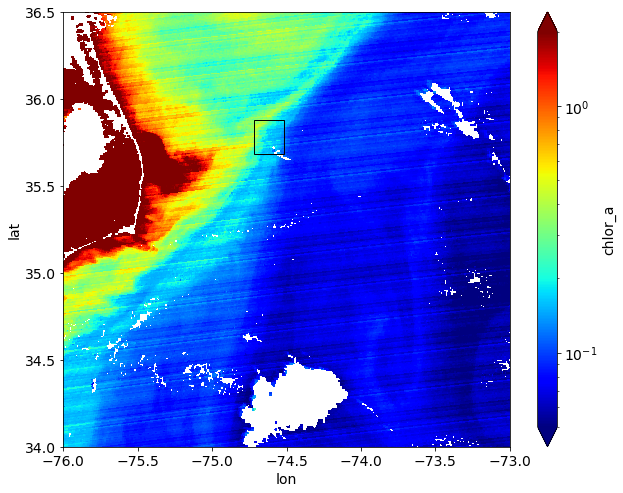

In [204]:
fig,ax = plt.subplots(figsize=(10,8))

chl_ds.chlor_a.plot(ax=ax,x='lon', y='lat', cmap='jet',vmax=2, vmin=0.05,norm=colors.LogNorm())
ax.set_xlim(-76,-73)
ax.set_ylim(34,36.5)
# Create a Rectangle patch
rect = patches.Rectangle((-74.71593, 35.88143), .2, -.2, linewidth=1, edgecolor='black', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
# fig.savefig('study_area_chla_V2021239182400_L2_SNPP_OC.png')

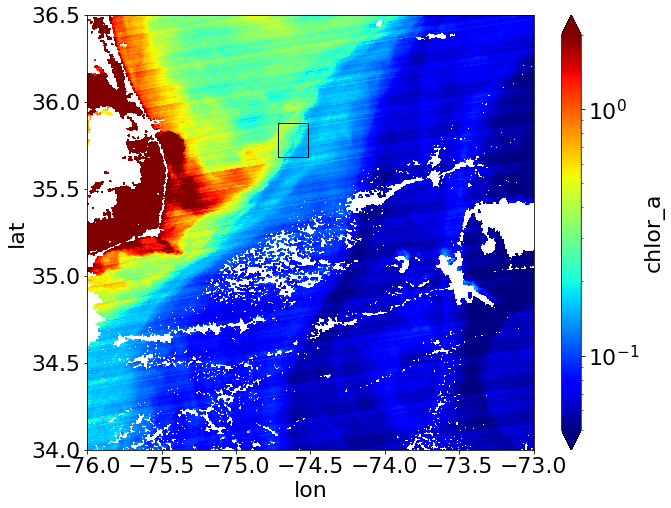

In [364]:
fig,ax = plt.subplots(figsize=(10,8))

chl_ds.chlor_a.plot(ax=ax,x='lon', y='lat', cmap='jet',vmax=2, vmin=0.05,norm=colors.LogNorm())
ax.set_xlim(-76,-73)
ax.set_ylim(34,36.5)
# Create a Rectangle patch
rect = patches.Rectangle((-74.71593, 35.88143), .2, -.2, linewidth=1, edgecolor='black', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
# fig.savefig('study_area_chla_V2021240180600_L2_SNPP_OC.png')

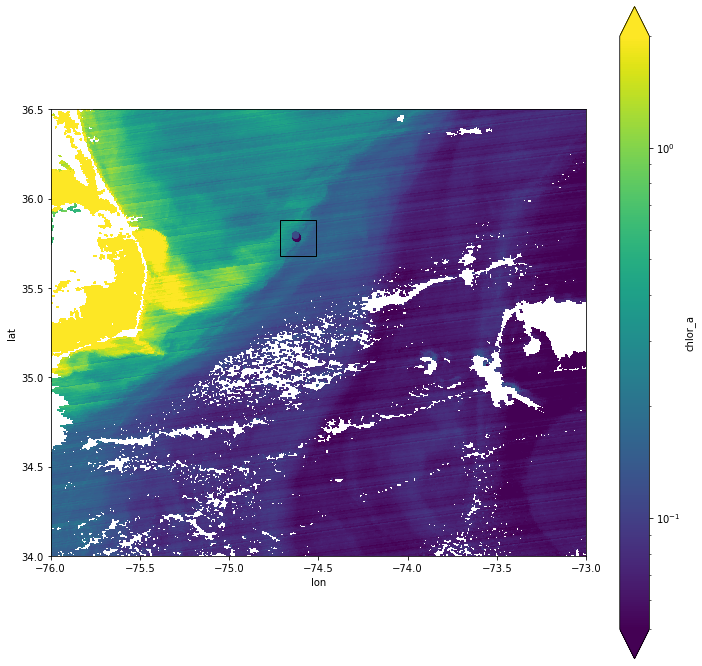

In [37]:
fig,ax = plt.subplots(figsize=(12,12))
chl_ds.chlor_a.plot(x='lon', y='lat', vmax=2, vmin=0.05, cmap='viridis', norm=colors.LogNorm())
ax.set_xlim(-76,-73)
ax.set_ylim(34,36.5)
gdf3.plot(column='chla',ax=ax, vmax=.3, vmin=0.2, cmap='viridis',alpha=0.2,)# norm=colors.LogNorm())

# Create a Rectangle patch
rect = patches.Rectangle((-74.71593, 35.88143), .2, -.2, linewidth=1, edgecolor='black', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


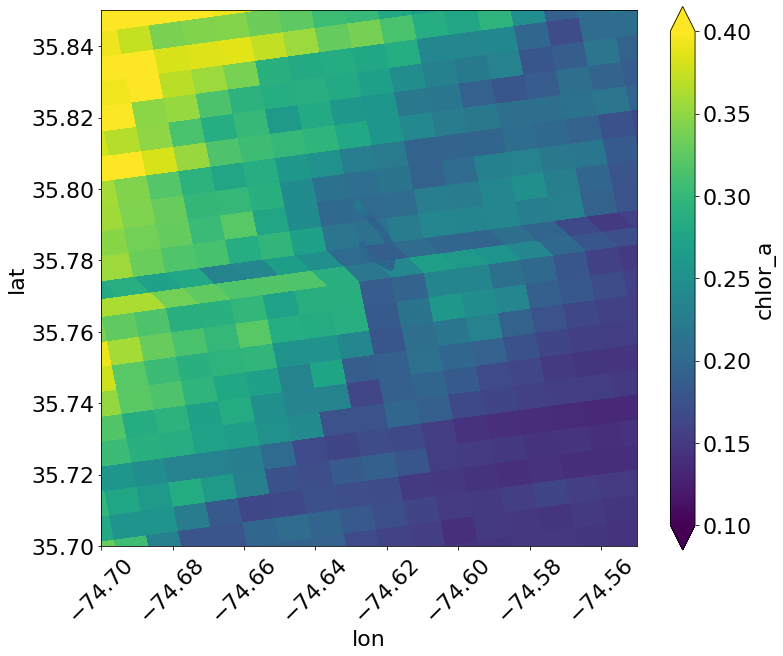

In [348]:
fig,ax = plt.subplots(figsize=(12,10))
chl_ds.chlor_a.plot(x='lon', y='lat', vmax=.4, vmin=0.1, cmap='viridis')
ax.set_xlim(-74.7,-74.55)
ax.set_ylim(35.7,35.85)
gdf3.plot(column='chla',ax=ax, vmax=.4, vmin=0.1, cmap='viridis',alpha=0.2,)# norm=colors.LogNorm())

# # Create a Rectangle patch
# rect = patches.Rectangle((-74.71593, 35.88143), .2, -.2, linewidth=1, edgecolor='black', facecolor='none')

# # Add the patch to the Axes
# ax.add_patch(rect)
ax.tick_params(axis='x', rotation=45)
# ax.set_title('VIIRS Aug 26th 2021')
fig.show()
plt.savefig('chla_map_uas_240_gdf3.png',)

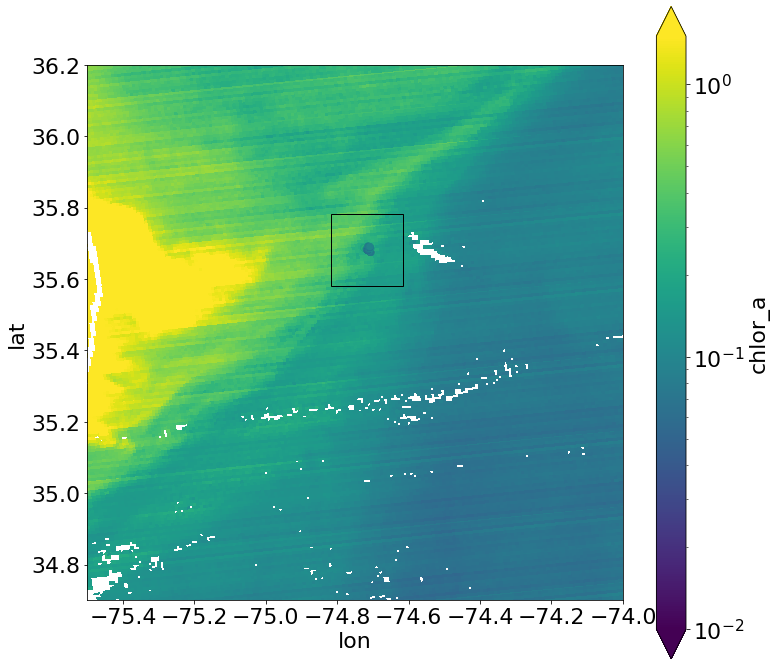

In [324]:
fig,ax = plt.subplots(figsize=(12,12))
chl_ds.chlor_a.plot(x='lon', y='lat', vmax=1.5, vmin=0.01, cmap='viridis', norm=colors.LogNorm())
ax.set_xlim(-75.5,-74)
ax.set_ylim(34.7,36.2)
gdf1.plot(column='chla',ax=ax, vmax=.3, vmin=0.2, cmap='viridis',alpha=0.2,)# norm=colors.LogNorm())

# Create a Rectangle patch
rect = patches.Rectangle((-74.81593, 35.78143), .2, -.2, linewidth=1, edgecolor='black', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

<AxesSubplot:xlabel='lon', ylabel='lat'>

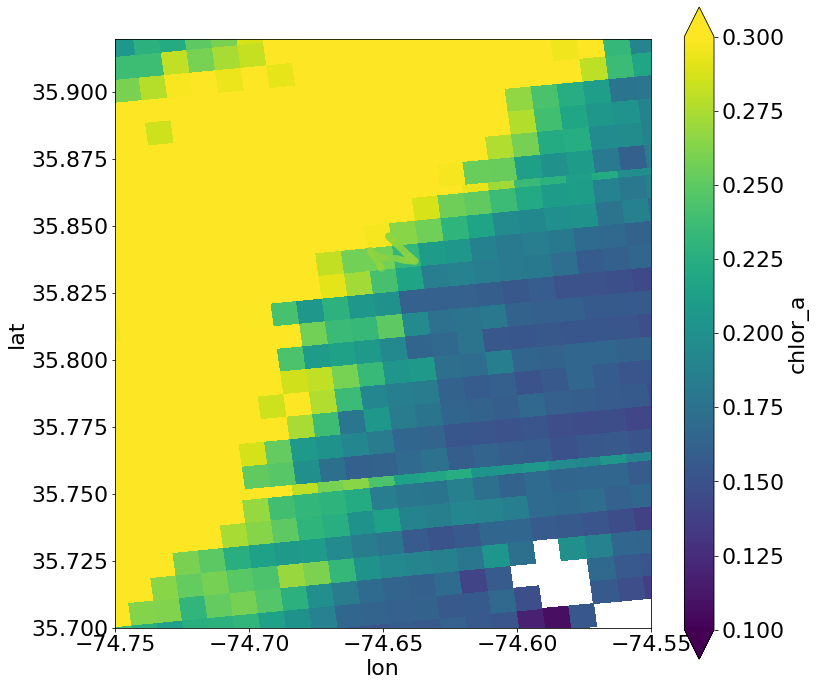

In [325]:
fig,ax = plt.subplots(figsize=(12,12))
chl_ds.chlor_a.plot(x='lon', y='lat', vmax=.3, vmin=0.1, cmap='viridis')
ax.set_xlim(-74.75,-74.55)
ax.set_ylim(35.7,35.92)
gdf2.plot(column='chla',ax=ax, vmax=.3, vmin=0.1, cmap='viridis',alpha=0.2,)# norm=colors.LogNorm())

# # Create a Rectangle patch
# rect = patches.Rectangle((-74.75, 35.93), .2, -.2, linewidth=1, edgecolor='black', facecolor='none')

# # Add the patch to the Axes
# ax.add_patch(rect)

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


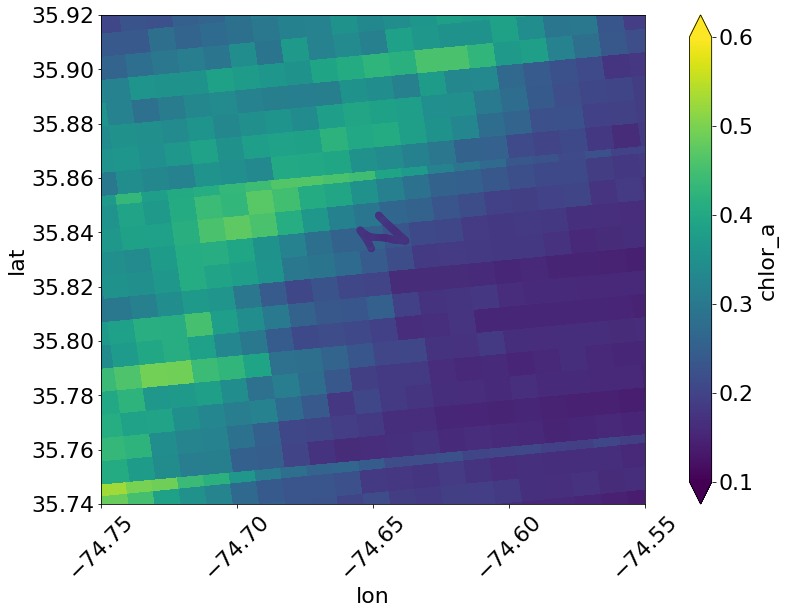

In [205]:
plt.rcParams.update({'font.size': 22})

fig,ax = plt.subplots(figsize=(16,9))

chl_ds.chlor_a.plot(ax=ax,x='lon', y='lat', vmax=.6, vmin=0.1, cmap='viridis')# norm=colors.LogNorm())
#sst_ds.sst.plot(ax=ax, x='lon', y='lat', vmax=17.5, vmin=26.5, cmap='inferno')
ax.set_xlim(-74.75,-74.55)
ax.set_ylim(35.74,35.92)

# gdf1.plot(column='chla',ax=ax, vmax=0.4,vmin=.1, cmap='viridis',alpha=0.6)# norm=colors.LogNorm())
gdf2.plot(column='chla',ax=ax, vmax=0.6,vmin=.1, cmap='viridis',alpha=0.6)# norm=colors.LogNorm())
# gdf3.plot(column='chla',ax=ax, vmin=0.04,vmax=.18, cmap='viridis',alpha=0.6,)# norm=colors.LogNorm())
ax.tick_params(axis='x', rotation=45)

fig.show()
plt.savefig('chla_map_uas_239_gdf2.png',)

(array([ 16.,  11., 107., 104.,  29.,  25.,  15.,   3.,   1.,   2.]),
 array([0.16329076, 0.1663642 , 0.16943764, 0.17251107, 0.17558451,
        0.17865795, 0.18173139, 0.18480483, 0.18787826, 0.1909517 ,
        0.19402514]),
 <BarContainer object of 10 artists>)

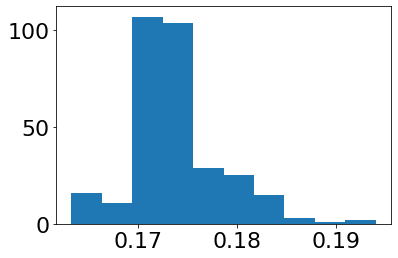

In [224]:
plt.hist(gdf2.chla)

<AxesSubplot:>

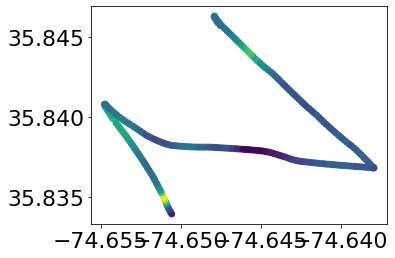

In [232]:
gdf2.iloc[:-90].plot(column='chla')

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


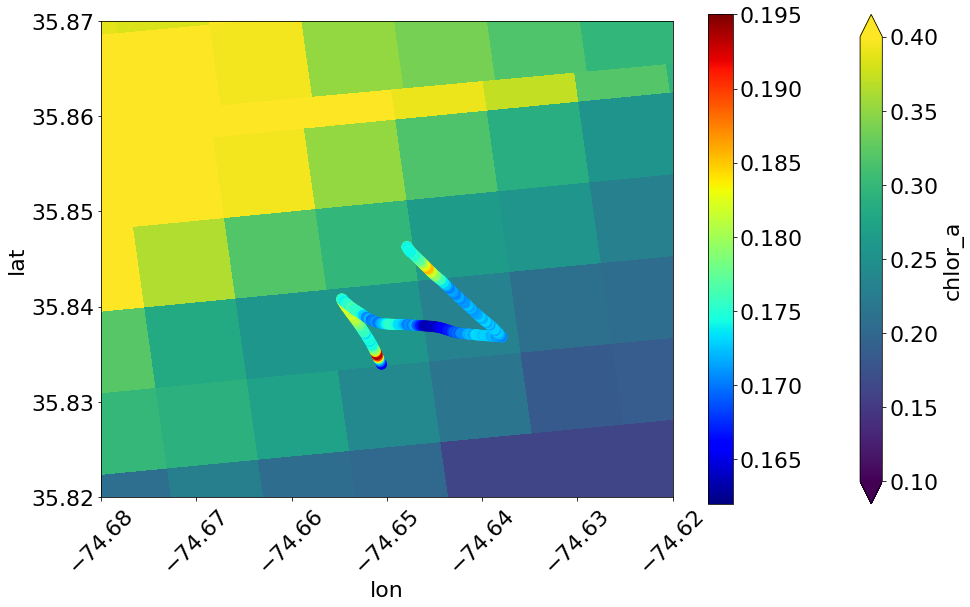

In [233]:
plt.rcParams.update({'font.size': 22})

fig,ax = plt.subplots(figsize=(16,9))

chl_ds.chlor_a.plot(ax=ax,x='lon', y='lat', vmax=.4, vmin=0.1, cmap='viridis')# norm=colors.LogNorm())
#sst_ds.sst.plot(ax=ax, x='lon', y='lat', vmax=17.5, vmin=26.5, cmap='inferno')
ax.set_xlim(-74.68,-74.62)
ax.set_ylim(35.82,35.87)

# gdf1.plot(column='chla',ax=ax, vmax=0.4,vmin=.1, cmap='viridis',alpha=0.6)# norm=colors.LogNorm())
gdf2.iloc[:-90].plot(column='chla',ax=ax, vmax=0.195,vmin=.162, cmap='jet',s=100, legend=True, label='UAS chlor_a')# norm=colors.LogNorm())
# gdf3.plot(column='chla',ax=ax, vmin=0.04,vmax=.18, cmap='viridis',alpha=0.6,)# norm=colors.LogNorm())
ax.tick_params(axis='x', rotation=45)

fig.show()
plt.savefig('chla_map_uas_239_gdf2_zoom.png',dpi=300)

(array([24., 60., 51., 16.,  2.,  5.,  9., 10., 10.,  1.]),
 array([0.18932795, 0.19353786, 0.19774776, 0.20195767, 0.20616757,
        0.21037748, 0.21458738, 0.21879729, 0.22300719, 0.2272171 ,
        0.231427  ]),
 <BarContainer object of 10 artists>)

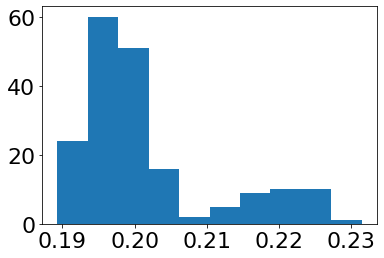

In [352]:
plt.hist(gdf3.chla)

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


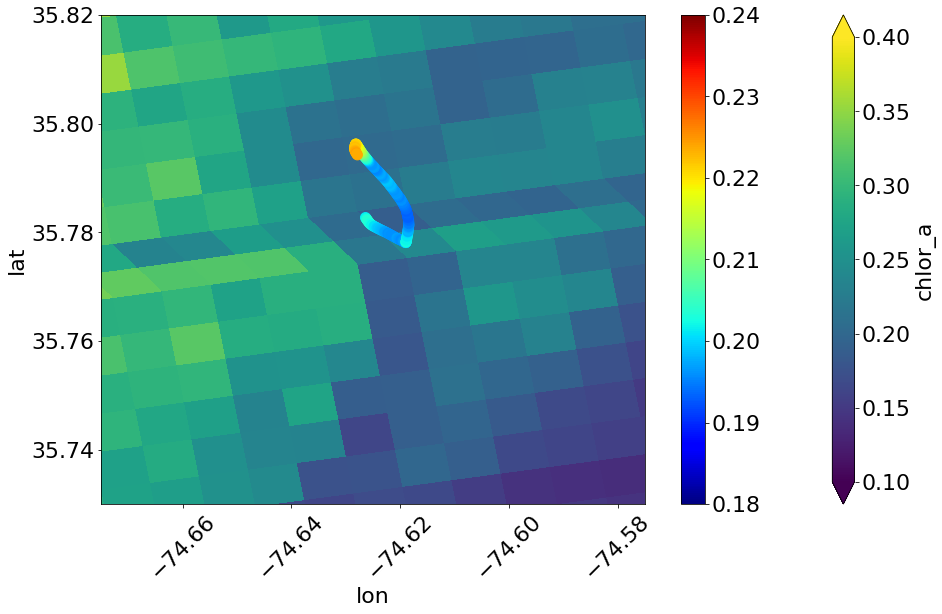

In [363]:
plt.rcParams.update({'font.size': 22})

fig,ax = plt.subplots(figsize=(16,9))
ax.tick_params(axis='x', rotation=45)

chl_ds.chlor_a.plot(ax=ax,x='lon', y='lat', vmax=.4, vmin=0.1, cmap='viridis')# norm=colors.LogNorm())
#sst_ds.sst.plot(ax=ax, x='lon', y='lat', vmax=17.5, vmin=26.5, cmap='inferno')
ax.set_xlim(-74.675,-74.575)
ax.set_ylim(35.73,35.82)

# gdf1.plot(column='chla',ax=ax, vmax=0.4,vmin=.1, cmap='viridis',alpha=0.6)# norm=colors.LogNorm())
gdf3.plot(gdf3.chla.rolling(12).mean(),ax=ax, vmax=0.24,vmin=.18, 
          cmap='jet',alpha=1,s=100, legend=True)# norm=colors.LogNorm())
# gdf3.plot(column='chla',ax=ax, vmax=.4, vmin=0.1, cmap='viridis',alpha=0.2,)# norm=colors.LogNorm())

# gdf3.plot(column='chla',ax=ax, vmin=0.04,vmax=.18, cmap='viridis',alpha=0.6,)# norm=colors.LogNorm())

ax.tick_params(axis='x', rotation=45)

fig.show()
plt.savefig('chla_map_uas_240_gdf3_zoom.png',dpi=300)

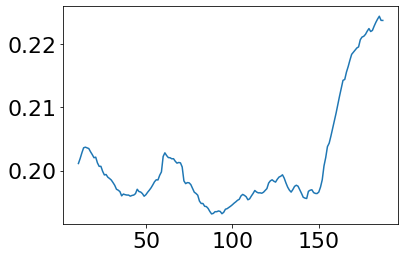

In [361]:
plt.plot(gdf3.chla.rolling(12).mean())

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


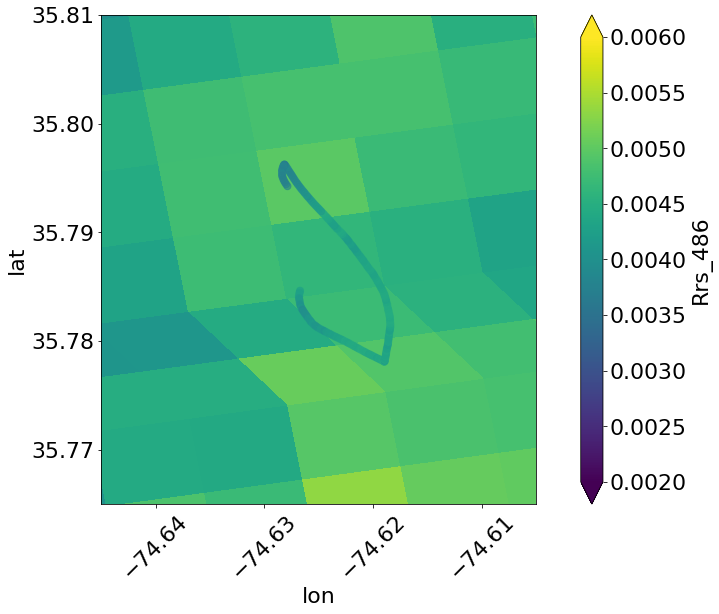

In [45]:
plt.rcParams.update({'font.size': 22})

fig,ax = plt.subplots(figsize=(16,9))
ax.tick_params(axis='x', rotation=45)

rrs_ds.Rrs_486.plot(ax=ax,x='lon', y='lat', vmax=.006, vmin=0.002, cmap='viridis')# norm=colors.LogNorm())
#sst_ds.sst.plot(ax=ax, x='lon', y='lat', vmax=17.5, vmin=26.5, cmap='inferno')
ax.set_xlim(-74.645,-74.605)
ax.set_ylim(35.765,35.81)

# gdf1.plot(column='chla',ax=ax, vmax=0.4,vmin=.1, cmap='viridis',alpha=0.6)# norm=colors.LogNorm())
gdf3.plot(gdf3.lw_spectra_float.map(lambda x: x[0]),ax=ax, vmax=0.006,vmin=.002, cmap='viridis',alpha=0.6,s=50)# norm=colors.LogNorm())
# gdf3.plot(column='chla',ax=ax, vmin=0.04,vmax=.18, cmap='viridis',alpha=0.6,)# norm=colors.LogNorm())

fig.show()
# plt.savefig('chla_map_uas.png',dpi=300)

In [130]:
rrs_ds

<xarray.Dataset>
Dimensions:  (x: 3232, y: 3200)
Coordinates:
    lat      (x, y) float32 33.29878 33.298492 33.29821 ... 47.546436 47.53859
    lon      (x, y) float32 -59.39956 -59.41746 ... -103.347694 -103.36826
Dimensions without coordinates: x, y
Data variables:
    Rrs_410  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    Rrs_443  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    Rrs_486  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    Rrs_551  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    Rrs_671  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    variable:  Rrs_410

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


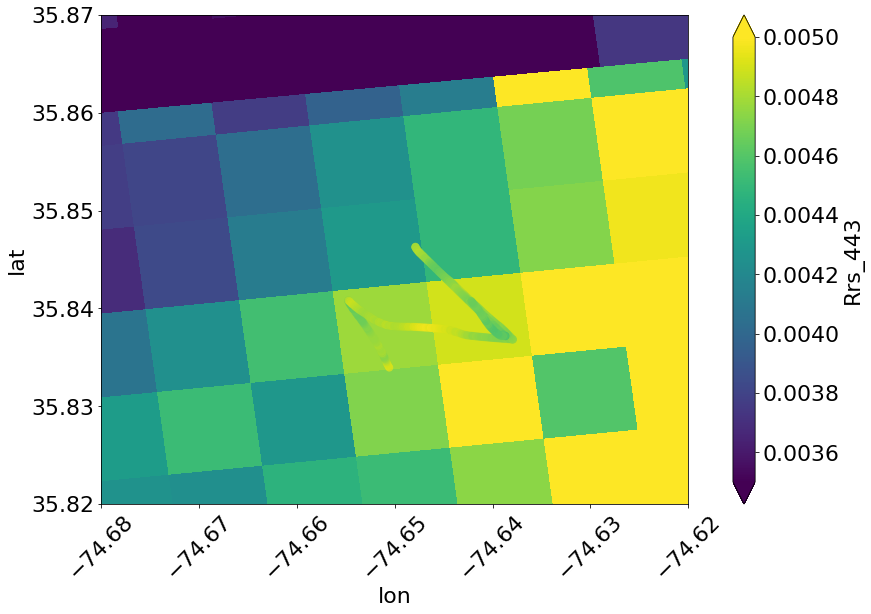

In [60]:
plt.rcParams.update({'font.size': 22})

fig,ax = plt.subplots(figsize=(16,9))
ax.tick_params(axis='x', rotation=45)

rrs_ds.Rrs_443.plot(ax=ax,x='lon', y='lat', vmax=.005, vmin=0.0035, cmap='viridis')# norm=colors.LogNorm())
#sst_ds.sst.plot(ax=ax, x='lon', y='lat', vmax=17.5, vmin=26.5, cmap='inferno')
ax.set_xlim(-74.68,-74.62)
ax.set_ylim(35.82,35.87)

# gdf1.plot(column='chla',ax=ax, vmax=0.4,vmin=.1, cmap='viridis',alpha=0.6)# norm=colors.LogNorm())
gdf2.plot(gdf2.lw_spectra_float.map(lambda x: x[0]),ax=ax, vmax=0.005,vmin=.0035, cmap='viridis',alpha=0.6,s=50)# norm=colors.LogNorm())
# gdf3.plot(column='chla',ax=ax, vmin=0.04,vmax=.18, cmap='viridis',alpha=0.6,)# norm=colors.LogNorm())

fig.show()
# plt.savefig('chla_map_uas.png',dpi=300)

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


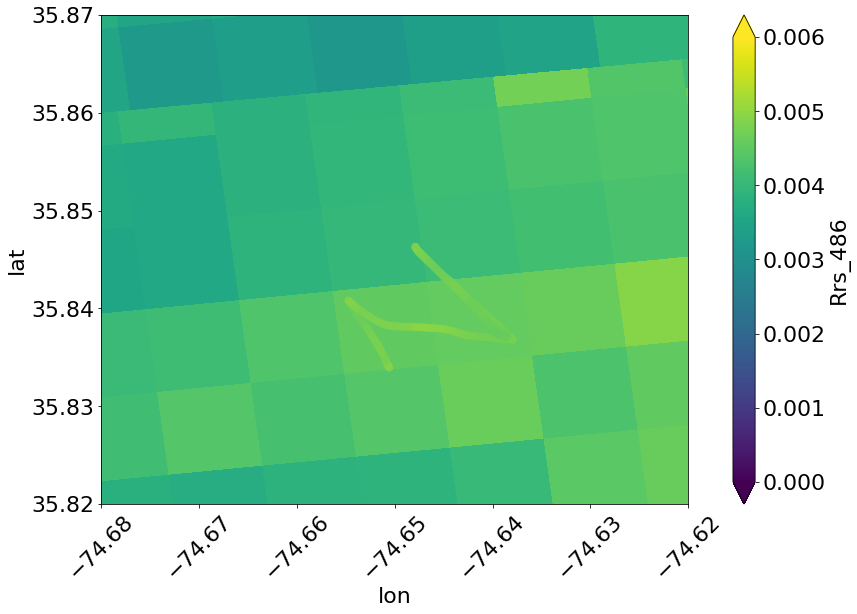

In [61]:
plt.rcParams.update({'font.size': 22})

fig,ax = plt.subplots(figsize=(16,9))
ax.tick_params(axis='x', rotation=45)

rrs_ds.Rrs_486.plot(ax=ax,x='lon', y='lat', vmax=.006, vmin=0.0, cmap='viridis')# norm=colors.LogNorm())
#sst_ds.sst.plot(ax=ax, x='lon', y='lat', vmax=17.5, vmin=26.5, cmap='inferno')
ax.set_xlim(-74.68,-74.62)
ax.set_ylim(35.82,35.87)

# gdf1.plot(column='chla',ax=ax, vmax=0.4,vmin=.1, cmap='viridis',alpha=0.6)# norm=colors.LogNorm())
gdf2.plot(gdf2.lw_spectra_float.map(lambda x: x[0]),ax=ax, vmax=0.006,vmin=.0, cmap='viridis',alpha=0.6,s=50)# norm=colors.LogNorm())
# gdf3.plot(column='chla',ax=ax, vmin=0.04,vmax=.18, cmap='viridis',alpha=0.6,)# norm=colors.LogNorm())

fig.show()
# plt.savefig('chla_map_uas.png',dpi=300)

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


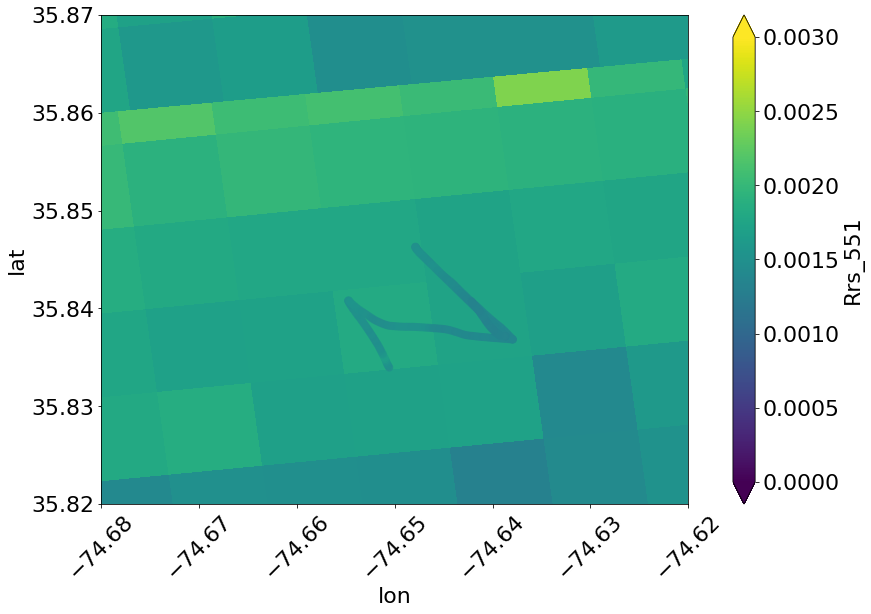

In [62]:
plt.rcParams.update({'font.size': 22})

fig,ax = plt.subplots(figsize=(16,9))
ax.tick_params(axis='x', rotation=45)

rrs_ds.Rrs_551.plot(ax=ax,x='lon', y='lat', vmax=.003, vmin=0.0, cmap='viridis')# norm=colors.LogNorm())
#sst_ds.sst.plot(ax=ax, x='lon', y='lat', vmax=17.5, vmin=26.5, cmap='inferno')
ax.set_xlim(-74.68,-74.62)
ax.set_ylim(35.82,35.87)

# gdf1.plot(column='chla',ax=ax, vmax=0.4,vmin=.1, cmap='viridis',alpha=0.6)# norm=colors.LogNorm())
gdf2.plot(gdf2.lw_spectra_float.map(lambda x: x[1]),ax=ax, vmax=0.003,vmin=.0, cmap='viridis',alpha=0.6,s=50)# norm=colors.LogNorm())
# gdf3.plot(column='chla',ax=ax, vmin=0.04,vmax=.18, cmap='viridis',alpha=0.6,)# norm=colors.LogNorm())

fig.show()
# plt.savefig('chla_map_uas.png',dpi=300)

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


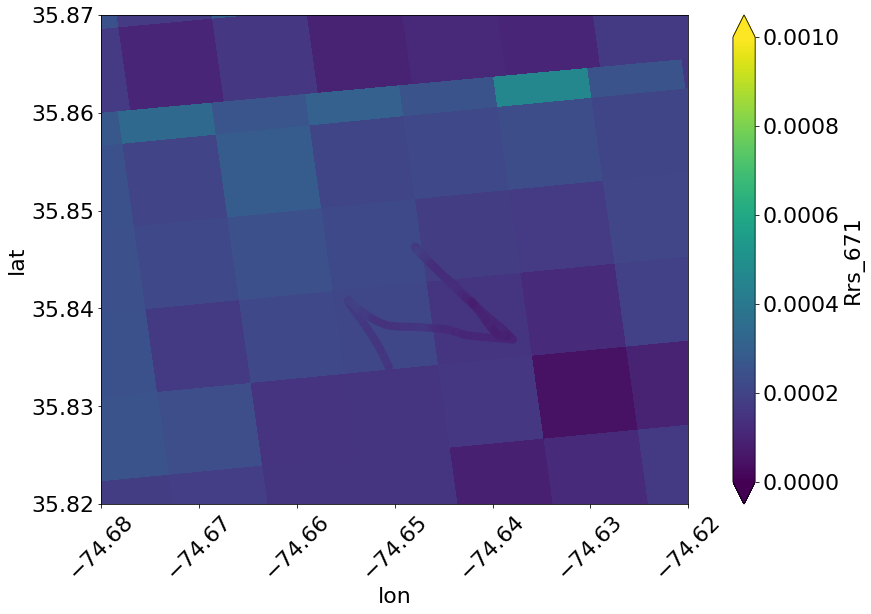

In [63]:
plt.rcParams.update({'font.size': 22})

fig,ax = plt.subplots(figsize=(16,9))
ax.tick_params(axis='x', rotation=45)

rrs_ds.Rrs_671.plot(ax=ax,x='lon', y='lat', vmax=.001, vmin=0.0, cmap='viridis')# norm=colors.LogNorm())
#sst_ds.sst.plot(ax=ax, x='lon', y='lat', vmax=17.5, vmin=26.5, cmap='inferno')
ax.set_xlim(-74.68,-74.62)
ax.set_ylim(35.82,35.87)

# gdf1.plot(column='chla',ax=ax, vmax=0.4,vmin=.1, cmap='viridis',alpha=0.6)# norm=colors.LogNorm())
gdf2.plot(gdf2.lw_spectra_float.map(lambda x: x[2]),ax=ax, vmax=0.001,vmin=.0, cmap='viridis',alpha=0.6,s=50)# norm=colors.LogNorm())
# gdf3.plot(column='chla',ax=ax, vmin=0.04,vmax=.18, cmap='viridis',alpha=0.6,)# norm=colors.LogNorm())

fig.show()
# plt.savefig('chla_map_uas.png',dpi=300)

In [182]:
rrs_ds

<xarray.Dataset>
Dimensions:  (x: 3232, y: 3200)
Coordinates:
    lat      (x, y) float32 33.29878 33.298492 33.29821 ... 47.546436 47.53859
    lon      (x, y) float32 -59.39956 -59.41746 ... -103.347694 -103.36826
Dimensions without coordinates: x, y
Data variables:
    Rrs_410  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    Rrs_443  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    Rrs_486  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    Rrs_551  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    Rrs_671  (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    variable:  Rrs_410

For 239

In [199]:
rrs_ds_subset = rrs_ds.where((rrs_ds.lon < -74.635) & (rrs_ds.lon > -74.655),drop=True)
rrs_ds_subset239 = rrs_ds_subset.where((rrs_ds_subset.lat < 35.85) & (rrs_ds_subset.lat > 35.83),drop=True)

/home/clifgray/anaconda3/envs/micasense_ocean_color/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


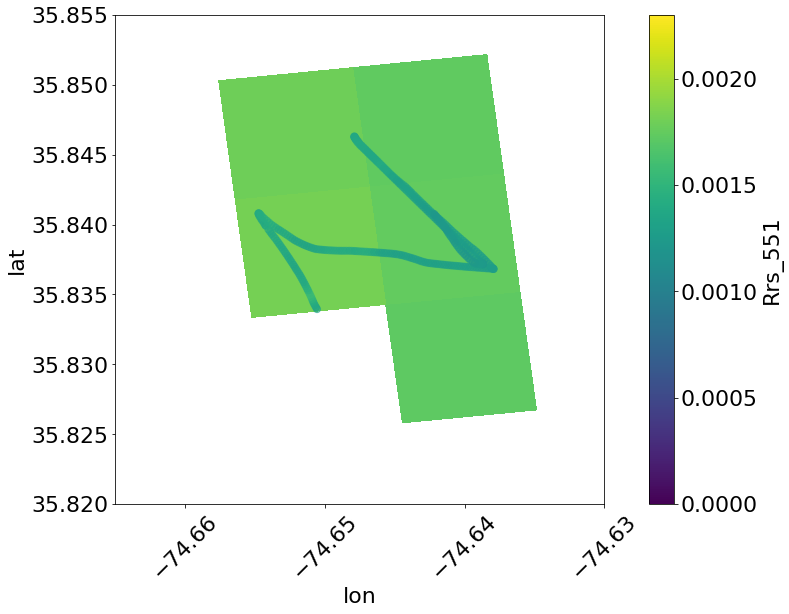

In [200]:
plt.rcParams.update({'font.size': 22})

fig,ax = plt.subplots(figsize=(16,9))
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(-74.665,-74.63)
ax.set_ylim(35.82,35.855)

rrs_ds_subset239.Rrs_551.plot(ax=ax,x='lon', y='lat', vmax=.0023, vmin=0.0, cmap='viridis')# norm=colors.LogNorm())
gdf2.plot(gdf2.lw_spectra_float.map(lambda x: x[1]),ax=ax, vmax=0.0025,vmin=.0, cmap='viridis',alpha=0.6,s=50)# norm=colors.LogNorm())

#sst_ds.sst.plot(ax=ax, x='lon', y='lat', vmax=17.5, vmin=26.5, cmap='inferno')
fig.show()
# plt.savefig('chla_map_uas.png',dpi=300)

For 240

In [204]:
rrs_ds_subset = rrs_ds.where((rrs_ds.lon < -74.615) & (rrs_ds.lon > -74.635),drop=True)
rrs_ds_subset240 = rrs_ds_subset.where((rrs_ds_subset.lat < 35.80) & (rrs_ds_subset.lat > 35.778),drop=True)

/home/clifgray/anaconda3/envs/micasense_ocean_color/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


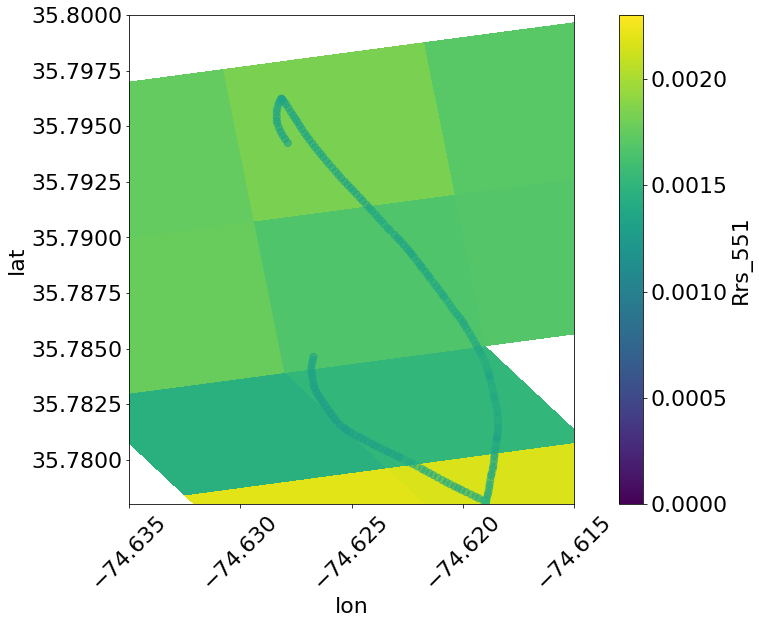

In [205]:
plt.rcParams.update({'font.size': 22})

fig,ax = plt.subplots(figsize=(16,9))
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(-74.635,-74.615)
ax.set_ylim(35.778,35.80)

rrs_ds_subset240.Rrs_551.plot(ax=ax,x='lon', y='lat', vmax=.0023, vmin=0.0, cmap='viridis')# norm=colors.LogNorm())
gdf3.plot(gdf3.lw_spectra_float.map(lambda x: x[1]),ax=ax, vmax=0.0025,vmin=.0, cmap='viridis',alpha=0.6,s=50)# norm=colors.LogNorm())

#sst_ds.sst.plot(ax=ax, x='lon', y='lat', vmax=17.5, vmin=26.5, cmap='inferno')
fig.show()
# plt.savefig('chla_map_uas.png',dpi=300)

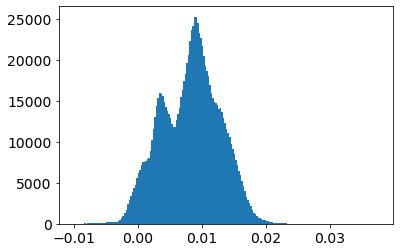

In [209]:
plt.hist(rrs_ds.Rrs_410.values.flatten(),bins=200)
plt.show()

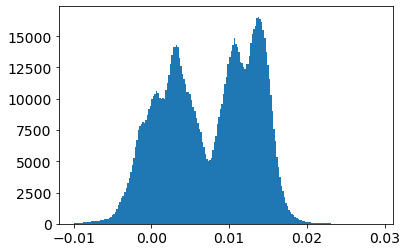

In [220]:
plt.hist(rrs_ds.Rrs_410.values.flatten(),bins=200)
plt.show()

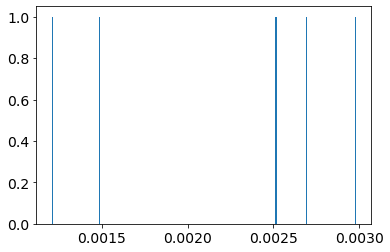

In [210]:
plt.hist(rrs_ds_subset239.Rrs_410.values.flatten(),bins=200)
plt.show()

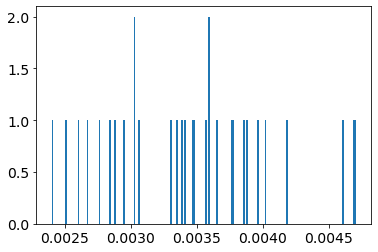

In [221]:
plt.hist(rrs_ds_subset240.Rrs_410.values.flatten(),bins=200)
plt.show()

In [338]:
[475, 560, 668, 842, 717]

[475, 560, 668, 842, 717]

In [207]:
len(rrs_ds_subset.Rrs_410.values.flatten())

1738816

In [206]:
len(rrs_ds_subset.Rrs_410.values.flatten()[~np.isnan(rrs_ds_subset.Rrs_410.values.flatten())])

1645

In [213]:
trios_gdf_transect.columns[346:351].astype(int)

Int64Index([665, 666, 667, 668, 669], dtype='int64')

In [ ]:
156,161,'blue'],[1,232,240,'green'],[2,346,351

In [284]:
trios_gdf_transect.columns[522]

'841'

0.002050766364898352

In [286]:
trios_means = [np.array(corrected_spec)[:,156].mean(),
               np.array(corrected_spec)[:,240].mean(),
               np.array(corrected_spec)[:,349].mean(),
               np.array(corrected_spec)[:,399].mean(),
               np.array(corrected_spec)[:,522].mean()
              ]
trios_means

[0.006427219248504908,
 0.002050766364898352,
 0.0003571095353901551,
 0.00016692407637376166,
 6.05693892486913e-05]

0.006427219248504908

In [264]:
corrected_spec[:][156]

IndexError: list index out of range

In [ ]:
trios_gdf_transect.columns[1:-7].astype(int),corrected_spec[i]

In [229]:
uas_matched_spec = []
for i in matched_subset.lw_spectra_float.values:
    uas_matched_spec.append(i)

In [232]:
uas_matched_spec = np.array(uas_matched_spec)

In [304]:
uas_matched_spec_gdf2 = []
for i in gdf2.lw_spectra_float.values:
    uas_matched_spec_gdf2.append(i)

In [306]:
uas_matched_spec_gdf2 = np.array(uas_matched_spec_gdf2)
uas_matched_spec_gdf2.mean(axis=0)

array([4.74989878e-03, 1.44458348e-03, 1.31736247e-04, 6.10142983e-05,
       9.50524824e-05])

In [320]:
uas_matched_spec_gdf3 = []
for i in gdf3.lw_spectra_float.values:
    uas_matched_spec_gdf3.append(i)

In [321]:
uas_matched_spec_gdf3 = np.array(uas_matched_spec_gdf3)
uas_matched_spec_gdf3.mean(axis=0)

array([4.22001486e-03, 1.49114750e-03, 1.84745467e-04, 8.28983320e-05,
       1.13201845e-04])

In [316]:
viirs_matched_spec_gdf2 = np.array([
    rrs_ds_subset239.Rrs_486.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_486.values.flatten())],
    rrs_ds_subset239.Rrs_551.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_551.values.flatten())],
    rrs_ds_subset239.Rrs_671.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_671.values.flatten())]
]).mean(axis=1)

In [322]:
viirs_matched_spec_gdf3 = np.array([
    rrs_ds_subset240.Rrs_486.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_486.values.flatten())],
    rrs_ds_subset240.Rrs_551.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_551.values.flatten())],
    rrs_ds_subset240.Rrs_671.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_671.values.flatten())]
]).mean(axis=1)

In [337]:
plt.rcParams.update({'font.size': 16})

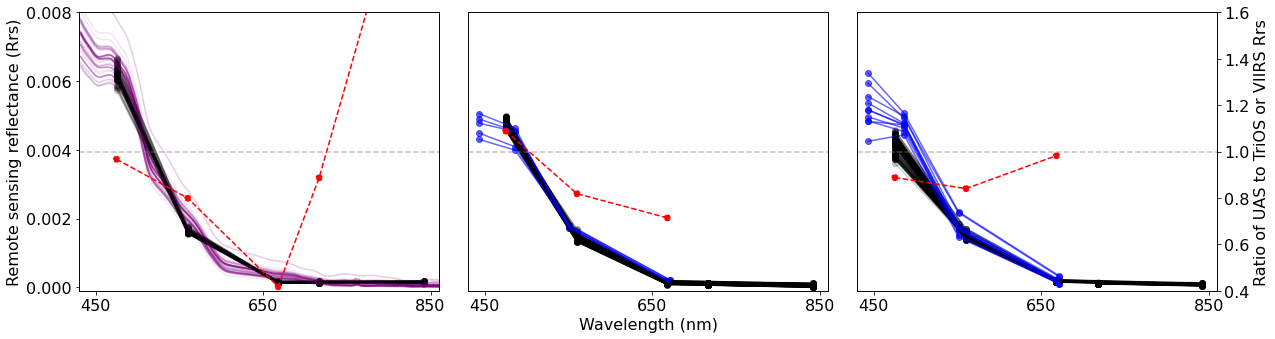

In [341]:
fig,ax = plt.subplots(1,3,figsize=(18,5))

######## TriOS

for i in range(len(matched_subset)):
    ax[0].plot(trios_gdf_transect.columns[1:-7].astype(int),corrected_spec[i], color='purple', alpha=0.1)
    ax[0].plot([475, 560, 668, 842, 717],matched_subset.iloc[i].lw_spectra_float, color='black', alpha=0.2)
    ax[0].scatter([475, 560, 668, 842, 717],matched_subset.iloc[i].lw_spectra_float, color='black', alpha=0.2)
ax[0].set_ylabel('Remote sensing reflectance (Rrs)')
# fig.savefig('comparing_trios_to_altum.png',dpi=300)

ax1 = ax[0].twinx()
ax1.plot([475, 560, 668, 717, 842],uas_matched_spec.mean(axis=0)/trios_means,color='red',ls='--')
ax1.scatter([475, 560, 668, 717, 842],uas_matched_spec.mean(axis=0)/trios_means,color='red',ls='--')

ax1.set_ylim(.4,1.6)
ax1.axhline(1,ls='--', color='grey', alpha=.5)
ax1.set_yticks([])
# ax1.set_ylim(-0.0001,0.008)




####### VIIRS 239

altum_wavelengths = np.array([475, 560, 668, 842, 717])
altum_wavelengths = np.repeat(altum_wavelengths[:, np.newaxis], len(gdf2.lw_spectra_float.map(lambda x: x[0])), axis=1)

ax[1].scatter(altum_wavelengths,[
                                         gdf2.lw_spectra_float.map(lambda x: x[0]), 
                                         gdf2.lw_spectra_float.map(lambda x: x[1]), 
                                         gdf2.lw_spectra_float.map(lambda x: x[2]),
                                         gdf2.lw_spectra_float.map(lambda x: x[3]),
                                         gdf2.lw_spectra_float.map(lambda x: x[4])], 
           color='black', alpha=0.2, label='UAS')

ax[1].plot(altum_wavelengths,[
                                         gdf2.lw_spectra_float.map(lambda x: x[0]), 
                                         gdf2.lw_spectra_float.map(lambda x: x[1]), 
                                         gdf2.lw_spectra_float.map(lambda x: x[2]),
                                         gdf2.lw_spectra_float.map(lambda x: x[3]),
                                         gdf2.lw_spectra_float.map(lambda x: x[4])], 
           color='black', alpha=0.2, label='UAS')

viirs_wavelengths = np.array([443,486,551,671]) #410
viirs_wavelengths = np.repeat(viirs_wavelengths[:, np.newaxis], 
                              len(rrs_ds_subset239.Rrs_443.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_443.values.flatten())]), axis=1)

ax[1].scatter(viirs_wavelengths,
         [   
             #rrs_ds_subset.Rrs_410.values.flatten()[~np.isnan(rrs_ds_subset.Rrs_410.values.flatten())],
             rrs_ds_subset239.Rrs_443.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_443.values.flatten())],
             rrs_ds_subset239.Rrs_486.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_486.values.flatten())],
             rrs_ds_subset239.Rrs_551.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_551.values.flatten())],
             rrs_ds_subset239.Rrs_671.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_671.values.flatten())],
         ], color='blue', alpha=0.6, label='VIIRS'
        )

ax[1].plot(viirs_wavelengths,
         [   
             #rrs_ds_subset.Rrs_410.values.flatten()[~np.isnan(rrs_ds_subset.Rrs_410.values.flatten())],
             rrs_ds_subset239.Rrs_443.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_443.values.flatten())],
             rrs_ds_subset239.Rrs_486.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_486.values.flatten())],
             rrs_ds_subset239.Rrs_551.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_551.values.flatten())],
             rrs_ds_subset239.Rrs_671.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_671.values.flatten())],
         ], color='blue', alpha=0.6, label='VIIRS'
        )

ax1 = ax[1].twinx()
ax1.plot([475, 560, 668],uas_matched_spec_gdf2.mean(axis=0)[:3]/viirs_matched_spec_gdf2,color='red',ls='--')
ax1.scatter([475, 560, 668],uas_matched_spec_gdf2.mean(axis=0)[:3]/viirs_matched_spec_gdf2,color='red',ls='--')

ax1.set_ylim(.4,1.6)
ax1.axhline(1,ls='--', color='grey', alpha=.5)
ax1.set_yticks([])
####### VIIRS 240

altum_wavelengths = np.array([475, 560, 668, 842, 717])
altum_wavelengths = np.repeat(altum_wavelengths[:, np.newaxis], len(gdf3.lw_spectra_float.map(lambda x: x[0])), axis=1)

ax[2].scatter(altum_wavelengths,[
                                         gdf3.lw_spectra_float.map(lambda x: x[0]), 
                                         gdf3.lw_spectra_float.map(lambda x: x[1]), 
                                         gdf3.lw_spectra_float.map(lambda x: x[2]),
                                         gdf3.lw_spectra_float.map(lambda x: x[3]),
                                         gdf3.lw_spectra_float.map(lambda x: x[4])], 
           color='black', alpha=0.2, label='UAS')

ax[2].plot(altum_wavelengths,[
                                         gdf3.lw_spectra_float.map(lambda x: x[0]), 
                                         gdf3.lw_spectra_float.map(lambda x: x[1]), 
                                         gdf3.lw_spectra_float.map(lambda x: x[2]),
                                         gdf3.lw_spectra_float.map(lambda x: x[3]),
                                         gdf3.lw_spectra_float.map(lambda x: x[4])], 
           color='black', alpha=0.2, label='UAS')

viirs_wavelengths = np.array([443,486,551,671]) #410
viirs_wavelengths = np.repeat(viirs_wavelengths[:, np.newaxis], 
                              len(rrs_ds_subset240.Rrs_443.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_443.values.flatten())]), axis=1)

ax[2].scatter(viirs_wavelengths,
         [   
             #rrs_ds_subset.Rrs_410.values.flatten()[~np.isnan(rrs_ds_subset.Rrs_410.values.flatten())],
             rrs_ds_subset240.Rrs_443.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_443.values.flatten())],
             rrs_ds_subset240.Rrs_486.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_486.values.flatten())],
             rrs_ds_subset240.Rrs_551.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_551.values.flatten())],
             rrs_ds_subset240.Rrs_671.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_671.values.flatten())],
         ], color='blue', alpha=0.6, label='VIIRS'
        )

ax[2].plot(viirs_wavelengths,
         [   
             #rrs_ds_subset.Rrs_410.values.flatten()[~np.isnan(rrs_ds_subset.Rrs_410.values.flatten())],
             rrs_ds_subset240.Rrs_443.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_443.values.flatten())],
             rrs_ds_subset240.Rrs_486.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_486.values.flatten())],
             rrs_ds_subset240.Rrs_551.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_551.values.flatten())],
             rrs_ds_subset240.Rrs_671.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_671.values.flatten())],
         ], color='blue', alpha=0.6, label='VIIRS'
        )

ax1 = ax[2].twinx()
ax1.plot([475, 560, 668],uas_matched_spec_gdf3.mean(axis=0)[:3]/viirs_matched_spec_gdf3,color='red',ls='--')
ax1.scatter([475, 560, 668],uas_matched_spec_gdf3.mean(axis=0)[:3]/viirs_matched_spec_gdf3,color='red',ls='--')

ax1.set_ylim(.4,1.6)
ax1.axhline(1,ls='--', color='grey', alpha=.5)
ax1.set_ylabel('Ratio of UAS to TriOS or VIIRS Rrs')


ax[0].set_xlim(430,860)
ax[1].set_xlim(430,860)
ax[2].set_xlim(430,860)

ax[0].set_ylim(-0.0001,0.008)
ax[1].set_ylim(-0.0001,0.008)
ax[2].set_ylim(-0.0001,0.008)

ax[0].set_xticks([450,650,850])
ax[1].set_xticks([450,650,850])
ax[2].set_xticks([450,650,850])

ax[1].set_yticks([])
ax[2].set_yticks([])
ax[1].set_xlabel('Wavelength (nm)')
fig.tight_layout()

fig.savefig('uas_vs_viirs_trios_239and240_revision1.png',dpi=300)

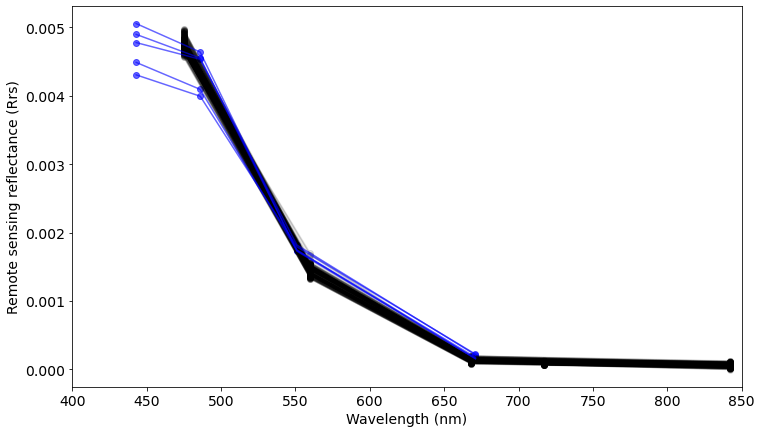

In [215]:
fig, ax = plt.subplots(figsize=(12,7))

# for i in range(len(matched_subset)):
#     ax.plot(trios_gdf_transect.columns[1:-7].astype(int),corrected_spec[i], color='green', alpha=0.1)

altum_wavelengths = np.array([475, 560, 668, 842, 717])
altum_wavelengths = np.repeat(altum_wavelengths[:, np.newaxis], len(gdf2.lw_spectra_float.map(lambda x: x[0])), axis=1)

ax.scatter(altum_wavelengths,[
                                         gdf2.lw_spectra_float.map(lambda x: x[0]), 
                                         gdf2.lw_spectra_float.map(lambda x: x[1]), 
                                         gdf2.lw_spectra_float.map(lambda x: x[2]),
                                         gdf2.lw_spectra_float.map(lambda x: x[3]),
                                         gdf2.lw_spectra_float.map(lambda x: x[4])], 
           color='black', alpha=0.1, label='UAS')

ax.plot(altum_wavelengths,[
                                         gdf2.lw_spectra_float.map(lambda x: x[0]), 
                                         gdf2.lw_spectra_float.map(lambda x: x[1]), 
                                         gdf2.lw_spectra_float.map(lambda x: x[2]),
                                         gdf2.lw_spectra_float.map(lambda x: x[3]),
                                         gdf2.lw_spectra_float.map(lambda x: x[4])], 
           color='black', alpha=0.1, label='UAS')

viirs_wavelengths = np.array([443,486,551,671]) #410
viirs_wavelengths = np.repeat(viirs_wavelengths[:, np.newaxis], 
                              len(rrs_ds_subset239.Rrs_443.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_443.values.flatten())]), axis=1)

ax.scatter(viirs_wavelengths,
         [   
             #rrs_ds_subset.Rrs_410.values.flatten()[~np.isnan(rrs_ds_subset.Rrs_410.values.flatten())],
             rrs_ds_subset239.Rrs_443.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_443.values.flatten())],
             rrs_ds_subset239.Rrs_486.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_486.values.flatten())],
             rrs_ds_subset239.Rrs_551.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_551.values.flatten())],
             rrs_ds_subset239.Rrs_671.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_671.values.flatten())],
         ], color='blue', alpha=0.6, label='VIIRS'
        )

ax.plot(viirs_wavelengths,
         [   
             #rrs_ds_subset.Rrs_410.values.flatten()[~np.isnan(rrs_ds_subset.Rrs_410.values.flatten())],
             rrs_ds_subset239.Rrs_443.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_443.values.flatten())],
             rrs_ds_subset239.Rrs_486.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_486.values.flatten())],
             rrs_ds_subset239.Rrs_551.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_551.values.flatten())],
             rrs_ds_subset239.Rrs_671.values.flatten()[~np.isnan(rrs_ds_subset239.Rrs_671.values.flatten())],
         ], color='blue', alpha=0.6, label='VIIRS'
        )

ax.set_xlim(400,850)
ax.set_ylabel('Remote sensing reflectance (Rrs)')
ax.set_xlabel('Wavelength (nm)')
fig.savefig('uas_vs_viirs_239.png')
plt.show()

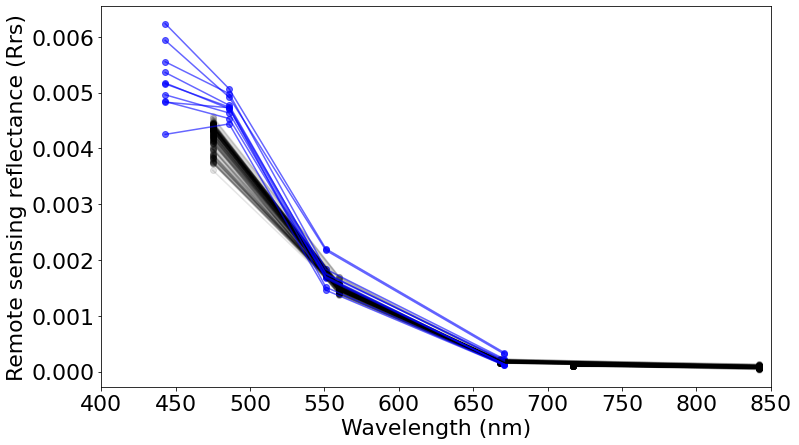

In [244]:
fig, ax = plt.subplots(figsize=(12,7))

# for i in range(len(matched_subset)):
#     ax.plot(trios_gdf_transect.columns[1:-7].astype(int),corrected_spec[i], color='green', alpha=0.1)

altum_wavelengths = np.array([475, 560, 668, 842, 717])
altum_wavelengths = np.repeat(altum_wavelengths[:, np.newaxis], len(gdf3.lw_spectra_float.map(lambda x: x[0])), axis=1)

ax.scatter(altum_wavelengths,[
                                         gdf3.lw_spectra_float.map(lambda x: x[0]), 
                                         gdf3.lw_spectra_float.map(lambda x: x[1]), 
                                         gdf3.lw_spectra_float.map(lambda x: x[2]),
                                         gdf3.lw_spectra_float.map(lambda x: x[3]),
                                         gdf3.lw_spectra_float.map(lambda x: x[4])], 
           color='black', alpha=0.1, label='UAS')

ax.plot(altum_wavelengths,[
                                         gdf3.lw_spectra_float.map(lambda x: x[0]), 
                                         gdf3.lw_spectra_float.map(lambda x: x[1]), 
                                         gdf3.lw_spectra_float.map(lambda x: x[2]),
                                         gdf3.lw_spectra_float.map(lambda x: x[3]),
                                         gdf3.lw_spectra_float.map(lambda x: x[4])], 
           color='black', alpha=0.1, label='UAS')

viirs_wavelengths = np.array([443,486,551,671]) #410
viirs_wavelengths = np.repeat(viirs_wavelengths[:, np.newaxis], 
                              len(rrs_ds_subset240.Rrs_443.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_443.values.flatten())]), axis=1)

ax.scatter(viirs_wavelengths,
         [   
             #rrs_ds_subset.Rrs_410.values.flatten()[~np.isnan(rrs_ds_subset.Rrs_410.values.flatten())],
             rrs_ds_subset240.Rrs_443.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_443.values.flatten())],
             rrs_ds_subset240.Rrs_486.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_486.values.flatten())],
             rrs_ds_subset240.Rrs_551.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_551.values.flatten())],
             rrs_ds_subset240.Rrs_671.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_671.values.flatten())],
         ], color='blue', alpha=0.6, label='VIIRS'
        )

ax.plot(viirs_wavelengths,
         [   
             #rrs_ds_subset.Rrs_410.values.flatten()[~np.isnan(rrs_ds_subset.Rrs_410.values.flatten())],
             rrs_ds_subset240.Rrs_443.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_443.values.flatten())],
             rrs_ds_subset240.Rrs_486.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_486.values.flatten())],
             rrs_ds_subset240.Rrs_551.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_551.values.flatten())],
             rrs_ds_subset240.Rrs_671.values.flatten()[~np.isnan(rrs_ds_subset240.Rrs_671.values.flatten())],
         ], color='blue', alpha=0.6, label='VIIRS'
        )

ax.set_xlim(400,850)
ax.set_ylabel('Remote sensing reflectance (Rrs)')
ax.set_xlabel('Wavelength (nm)')
# fig.savefig('uas_vs_viirs_240.png')
plt.show()

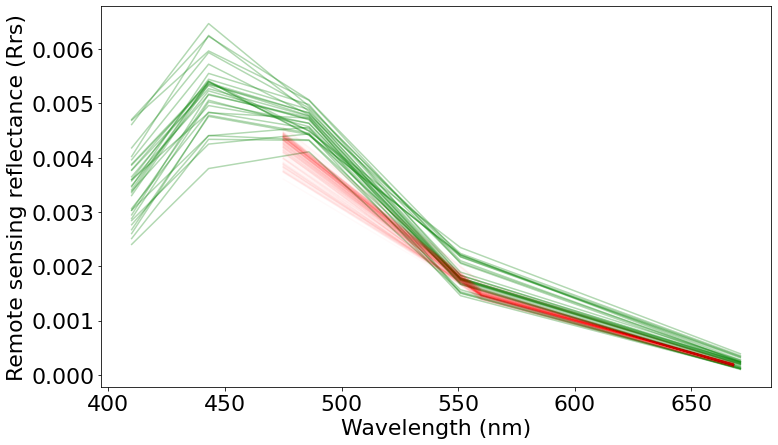

In [49]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot([410,443,486,551,671],
         [   
             rrs_ds_subset.Rrs_410.values.flatten(),
             rrs_ds_subset.Rrs_443.values.flatten(),
             rrs_ds_subset.Rrs_486.values.flatten(),
             rrs_ds_subset.Rrs_551.values.flatten(),
             rrs_ds_subset.Rrs_671.values.flatten()
         ], color='green', alpha=0.3, label='VIIRS'
        )
ax.plot([475, 560, 668],[gdf3.lw_spectra_float.map(lambda x: x[0]), 
                         gdf3.lw_spectra_float.map(lambda x: x[1]), 
                         gdf3.lw_spectra_float.map(lambda x: x[2])], color='red', alpha=0.02, label='UAS')

ax.set_ylabel('Remote sensing reflectance (Rrs)')
ax.set_xlabel('Wavelength (nm)')
# fig.savefig('uas_vs_viirs_240.png')
plt.show()

In [50]:
viirs_oci = oc_index(rrs_ds_subset.Rrs_486.values.flatten(),
             rrs_ds_subset.Rrs_551.values.flatten(),
             rrs_ds_subset.Rrs_671.values.flatten())

In [51]:
np.mean(viirs_oci[~np.isnan(viirs_oci)])

0.21119858

In [52]:
np.mean(gdf3.chla)

0.2018235987129742

In [343]:
np.count_nonzero(~np.isnan(rrs_ds_subset.Rrs_410.values.flatten()))

17

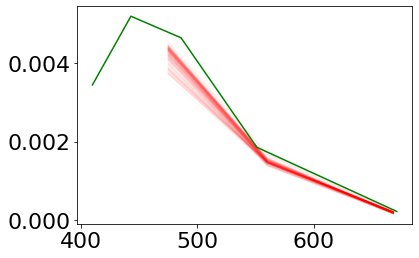

In [53]:
plt.plot([475, 560, 668],[gdf3.lw_spectra_float.map(lambda x: x[0]), 
                         gdf3.lw_spectra_float.map(lambda x: x[1]), 
                         gdf3.lw_spectra_float.map(lambda x: x[2])], color='red', alpha=0.02)

plt.plot([410,443,486,551,671],
         [rrs_ds_subset.Rrs_410.mean(),
          rrs_ds_subset.Rrs_443.mean(),
          rrs_ds_subset.Rrs_486.mean(),
          rrs_ds_subset.Rrs_551.mean(),
          rrs_ds_subset.Rrs_671.mean()], 
         color='green')
plt.show()

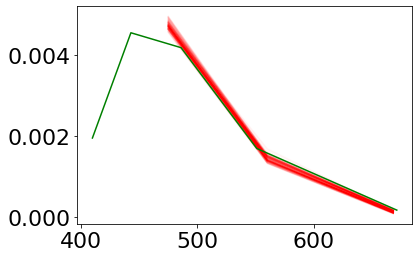

In [66]:
plt.plot([475, 560, 668],[gdf2.lw_spectra_float.map(lambda x: x[0]), 
                         gdf2.lw_spectra_float.map(lambda x: x[1]), 
                         gdf2.lw_spectra_float.map(lambda x: x[2])], color='red', alpha=0.02)

plt.plot([410,443,486,551,671],
         [rrs_ds_subset.Rrs_410.mean(),
          rrs_ds_subset.Rrs_443.mean(),
          rrs_ds_subset.Rrs_486.mean(),
          rrs_ds_subset.Rrs_551.mean(),
          rrs_ds_subset.Rrs_671.mean()], 
         color='green')
plt.show()

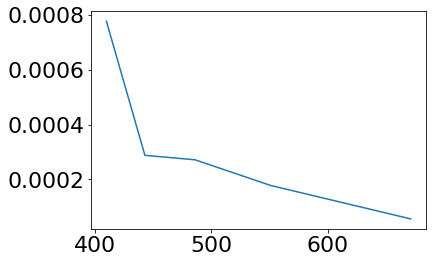

In [345]:
plt.plot([410,443,486,551,671],[rrs_ds_subset.Rrs_410.std(),rrs_ds_subset.Rrs_443.std(),rrs_ds_subset.Rrs_486.std(),rrs_ds_subset.Rrs_551.std(),rrs_ds_subset.Rrs_671.std()])

### pull out values from OLCI based on drone locations

(35.7, 35.92)

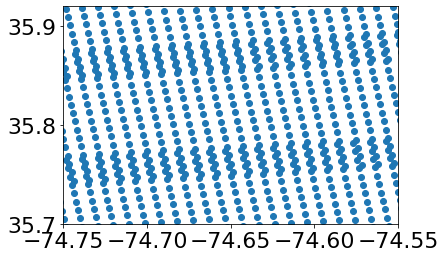

In [56]:
fig,ax = plt.subplots()
ax.scatter(chl_ds.lon, chl_ds.lat)
ax.set_xlim(-74.75,-74.55)
ax.set_ylim(35.7,35.92)

In [86]:
c = np.maximum(abslon, abslat)
c

NameError: name 'abslon' is not defined

In [ ]:
([xloc], [yloc]) = np.where(c == np.min(c))
xloc,yloc

(35.7, 35.92)

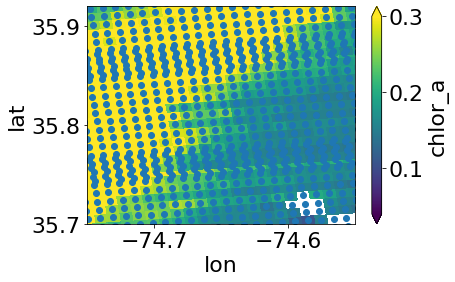

In [57]:
fig,ax = plt.subplots()
chl_ds.chlor_a.plot(ax=ax,x='lon', y='lat', vmax=.3, vmin=0.04, cmap='viridis')
ax.scatter(chl_ds.lon, chl_ds.lat)
ax.set_xlim(-74.75,-74.55)
ax.set_ylim(35.7,35.92)

Show that we can find the nearest pixel to the drone chla point

In [65]:
[xloc], [yloc]

([1034], [903])

In [67]:
chl_ds.isel(x=xloc, y=yloc)

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    lat      float32 35.83806
    lon      float32 -74.65103
Data variables:
    chlor_a  float32 0.25736877
Attributes:
    variable:  Chlorophyll-a

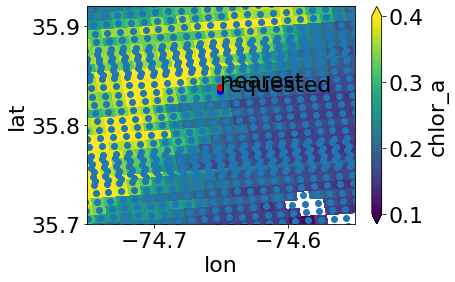

In [68]:
centroids = gdf2.centroid

fig,ax = plt.subplots()
chl_ds.chlor_a.plot(ax=ax,x='lon', y='lat', vmax=.4, vmin=0.1, cmap='viridis')
ax.scatter(chl_ds.lon, chl_ds.lat)

# I want to find the chla at a certain lat/lon point.
lat = centroids.y.iloc[0]
lon = centroids.x.iloc[0]

# First, find the index of the grid point nearest a specific lat/lon.   
abslat = np.abs(chl_ds.lat-lat)
abslon = np.abs(chl_ds.lon-lon)
c = np.maximum(abslon, abslat)

([xloc], [yloc]) = np.where(c == np.min(c))

# # Now I can use that index location to get the values at the x/y diminsion
point_ds = chl_ds.isel(x=xloc, y=yloc)

# Plot requested lat/lon point blue
ax.scatter(lon, lat, color='b')
ax.text(lon, lat, 'requested')

# # Plot nearest point in the array red
ax.scatter(point_ds.lon, point_ds.lat, color='r')
ax.text(point_ds.lon, point_ds.lat, 'nearest')
ax.set_xlim(-74.75,-74.55)
ax.set_ylim(35.7,35.92)
plt.show()

In [9]:
# this is based on https://stackoverflow.com/questions/58758480/xarray-select-nearest-lat-lon-with-multi-dimension-coordinates
values = []
centroids = gdf3.centroid
for i in range(len(centroids)):
    # I want to find the speed at a certain lat/lon point.
    lat = centroids.y.iloc[i]
    lon = centroids.x.iloc[i]

    # First, find the index of the grid point nearest a specific lat/lon.   
    abslat = np.abs(chl_ds.lat-lat)
    abslon = np.abs(chl_ds.lon-lon)
    c = np.maximum(abslon, abslat)
    if len(np.where(c == np.min(c))[0])==2:
        xloc = np.where(c == np.min(c))[0][0]
        yloc = np.where(c == np.min(c))[1][0]
    else:
        ([xloc], [yloc]) = np.where(c == np.min(c))
    # Now I can use that index location to get the values at the x/y diminsion
    point_ds = chl_ds.isel(x=xloc, y=yloc)

    values.append(point_ds.chlor_a.values)

In [10]:
gdf3['viirs_chla'] = values

In [72]:
gdf2['viirs_chla'] = values

In [126]:
# this is based on https://stackoverflow.com/questions/58758480/xarray-select-nearest-lat-lon-with-multi-dimension-coordinates
values = []
centroids = gdf_all_flights.centroid
for i in range(len(centroids)):
    # I want to find the speed at a certain lat/lon point.
    lat = centroids.y.iloc[i]
    lon = centroids.x.iloc[i]

    # First, find the index of the grid point nearest a specific lat/lon.   
    abslat = np.abs(chl_ds.lat-lat)
    abslon = np.abs(chl_ds.lon-lon)
    c = np.maximum(abslon, abslat)
    if len(np.where(c == np.min(c))[0])==2:
        xloc = np.where(c == np.min(c))[0][0]
        yloc = np.where(c == np.min(c))[1][0]
    else:
        ([xloc], [yloc]) = np.where(c == np.min(c))
    # Now I can use that index location to get the values at the x/y diminsion
    point_ds = chl_ds.sel(x=xloc, y=yloc)

    values.append(point_ds.chlor_a.values)

In [127]:
gdf_all_flights['modis_chla'] = values

In [128]:
# this is based on https://stackoverflow.com/questions/58758480/xarray-select-nearest-lat-lon-with-multi-dimension-coordinates
values = []
centroids = gdf_all_flights.centroid
for i in range(len(centroids)):
    # I want to find the speed at a certain lat/lon point.
    lat = centroids.y.iloc[i]
    lon = centroids.x.iloc[i]

    # First, find the index of the grid point nearest a specific lat/lon.   
    abslat = np.abs(viirs_ds.lat-lat)
    abslon = np.abs(viirs_ds.lon-lon)
    c = np.maximum(abslon, abslat)
    if len(np.where(c == np.min(c))[0])==2:
        xloc = np.where(c == np.min(c))[0][0]
        yloc = np.where(c == np.min(c))[1][0]
    else:
        ([xloc], [yloc]) = np.where(c == np.min(c))
    # Now I can use that index location to get the values at the x/y diminsion
    point_ds = viirs_ds.isel(x=yloc, y=xloc)

    values.append(point_ds.chlor_a.values)

In [129]:
gdf_all_flights['viirs_chla'] = values

Now compare these values with the uas_chla

In [130]:
gdf_all_flights.head(2)

chla   Latitude  Longitude     sst             time_str  \
0  0.122446  34.039461 -76.276736  289.23  2021-04-27 13:10:57   
1  0.121662  34.039461 -76.276739  289.36  2021-04-27 13:10:59   

                     geometry  sst_c                time  chla_rolling  \
0  POINT (-76.27674 34.03946)  16.08 2021-04-27 13:10:57           NaN   
1  POINT (-76.27674 34.03946)  16.21 2021-04-27 13:10:59           NaN   

    olci_chla  modis_chla      viirs_chla  
0  0.16315427  0.16811597  [[0.15206487]]  
1  0.16315427  0.16811597  [[0.15206487]]

In [131]:
# fig,ax = plt.subplots(figsize=(10,10))

# ax.scatter(gdf4.chla, values)
# # ax.set_ylim(0,.3)
# # ax.set_xlim(0,.3)

In [138]:
insitu_gdf_front_cut = insitu_gdf_front[insitu_gdf_front.Chla < 0.20]
insitu_gdf_front_cut = insitu_gdf_front_cut[insitu_gdf_front_cut.pt_dist < 3]

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))

ax.scatter(gdf3.viirs_chla, gdf3.blue, alpha=0.4, color='teal', label='VIIRS')
# ax.scatter(gdf_all_flights.modis_chla, gdf_all_flights.chla, alpha=0.3, color='blue', label='MODIS')
# ax.scatter(gdf_all_flights.olci_chla, gdf_all_flights.chla, alpha=0.3, color='green', label='OLCI')

# ax.scatter(insitu_gdf_front_cut.Chla, insitu_gdf_front_cut.uas_chla,  color='black', label='In-situ')
ax.set_ylabel('UAS Chla Measurement')
ax.set_xlabel('Satellite / In-situ Chla Measurement')
ax.set_ylim(.0,.35)
ax.set_xlim(0.0,.35)
ax.legend()
# ax.plot([0,1], [0,1], color='k', linestyle='--', linewidth=2, alpha=0.2)
# plt.savefig('sat_insitu_comparison.png', dpi=300)

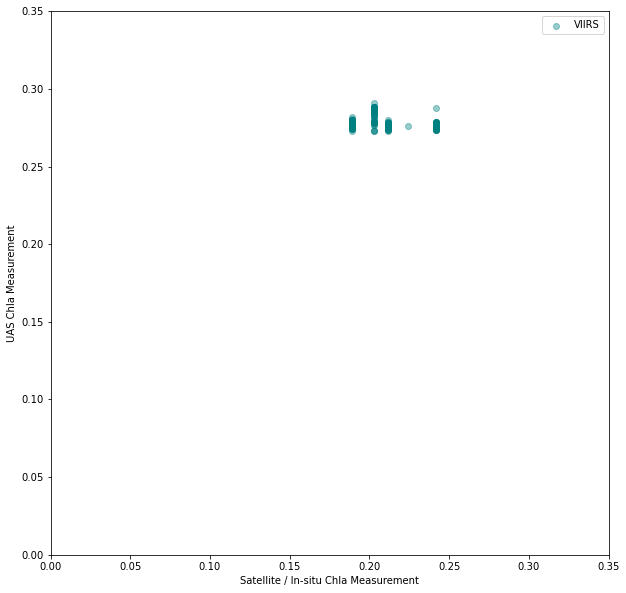

In [12]:
fig,ax = plt.subplots(figsize=(10,10))

ax.scatter(gdf3.viirs_chla, gdf3.chla, alpha=0.4, color='teal', label='VIIRS')
# ax.scatter(gdf_all_flights.modis_chla, gdf_all_flights.chla, alpha=0.3, color='blue', label='MODIS')
# ax.scatter(gdf_all_flights.olci_chla, gdf_all_flights.chla, alpha=0.3, color='green', label='OLCI')

# ax.scatter(insitu_gdf_front_cut.Chla, insitu_gdf_front_cut.uas_chla,  color='black', label='In-situ')
ax.set_ylabel('UAS Chla Measurement')
ax.set_xlabel('Satellite / In-situ Chla Measurement')
ax.set_ylim(.0,.35)
ax.set_xlim(0.0,.35)
ax.legend()
# ax.plot([0,1], [0,1], color='k', linestyle='--', linewidth=2, alpha=0.2)
# plt.savefig('sat_insitu_comparison.png', dpi=300)

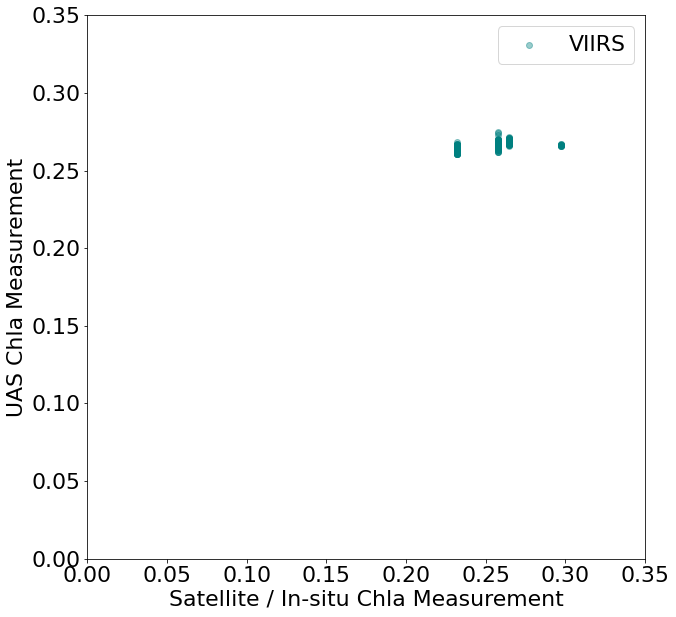

In [78]:
fig,ax = plt.subplots(figsize=(10,10))

ax.scatter(gdf2.viirs_chla, gdf2.chla, alpha=0.4, color='teal', label='VIIRS')
# ax.scatter(gdf_all_flights.modis_chla, gdf_all_flights.chla, alpha=0.3, color='blue', label='MODIS')
# ax.scatter(gdf_all_flights.olci_chla, gdf_all_flights.chla, alpha=0.3, color='green', label='OLCI')

# ax.scatter(insitu_gdf_front_cut.Chla, insitu_gdf_front_cut.uas_chla,  color='black', label='In-situ')
ax.set_ylabel('UAS Chla Measurement')
ax.set_xlabel('Satellite / In-situ Chla Measurement')
ax.set_ylim(.0,.35)
ax.set_xlim(0.0,.35)
ax.legend()
# ax.plot([0,1], [0,1], color='k', linestyle='--', linewidth=2, alpha=0.2)
# plt.savefig('sat_insitu_comparison.png', dpi=300)